In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 20)

import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import metrics
#importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#connecting with drive, required if your dataset is in drive

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/walmart/train[1].csv")
features = pd.read_csv('/content/drive/MyDrive/walmart/features[1].csv')
sample = pd.read_csv('/content/drive/MyDrive/walmart/sampleSubmission.csv')
stores  = pd.read_csv('/content/drive/MyDrive/walmart/stores[1].csv')
test = pd.read_csv('/content/drive/MyDrive/walmart/test[1].csv')

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
print(test.Date.nunique())


39


In [ ]:
def cal (start, end):
    df_cal= pd.DataFrame({"date": pd.date_range(start, end)})
    df_cal["year"] = df_cal.date.dt.year
    df_cal["month"]= df_cal.date.dt.month
    df_cal['year_month'] = pd.to_datetime(df_cal['date']).dt.to_period('M')
    df_cal["week_num"]= df_cal.date.dt.week
    #df_cal["week_day"]= df_cal.date.dt.weekday
    #df_cal["week_day_name"]= df_cal.date.dt.weekday_name
    #df_cal["day_of_year"]= df_cal.date.dt.dayofyear
    #df_cal['date'] = df_cal['date'].dt.strftime('%Y-%m-%d')
    return df_cal

  #function for forming proper date time calendar

In [ ]:
pd.to_datetime(train.Date[0], format = '%Y-%m-%d').strftime('%A')

'Friday'

In [ ]:
train.Date = pd.to_datetime(train.Date, format = '%Y-%m-%d')
train.Date.freq = 'W-FRI'
#freq -W-FRI

In [ ]:
train_d = train.Date.unique()
train_d.sort(axis = 0)
train_cal = cal(train_d[0], train_d[-1])

# merge calendar to train set
train_d = pd.merge(train, train_cal, left_on = 'Date', right_on = 'date', how = 'left')
train_d = train_d.drop('date', axis = 1)
#train_d.head(1)

# Assigning frequency to features set
features.Date = pd.to_datetime(features.Date, format = '%Y-%m-%d')
features.Date.freq = 'W-FRI'

tfd = pd.merge (train_d[[i for i in train_d.columns if i not in ['IsHoliday']]], features, left_on = ['Date', 'Store'], right_on = ['Date', 'Store'], how = 'left')
tfd = pd.merge(tfd,stores, how = 'left',  left_on= 'Store', right_on = 'Store')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
pd.to_datetime(test.Date[0], format = '%Y-%m-%d').strftime('%A')
test.Date = pd.to_datetime(test.Date, format = '%Y-%m-%d')
test.Date.freq = 'W-FRI'
test_d = test.Date.unique()
test_d.sort(axis = 0)
test_cal = cal(test_d[0], test_d[-1])

# merge calendar to train set
test_d = pd.merge(test, test_cal, left_on = 'Date', right_on = 'date', how = 'left')
test_d = test_d.drop('date', axis = 1)
features.Date = pd.to_datetime(features.Date, format = '%Y-%m-%d')
features.Date.freq = 'W-FRI'

testfd = pd.merge (test_d[[i for i in test_d.columns if i not in ['IsHoliday']]], features, left_on = ['Date', 'Store'], right_on = ['Date', 'Store'], how = 'left')
testfd = pd.merge(testfd,stores, how = 'left',  left_on= 'Store', right_on = 'Store')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
testfd

,Store,Dept,Date,year,month,year_month,week_num,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2012-11-02,2012,11,2012-11,44,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315
1,1,1,2012-11-09,2012,11,2012-11,45,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,A,151315
2,1,1,2012-11-16,2012,11,2012-11,46,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,A,151315
3,1,1,2012-11-23,2012,11,2012-11,47,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True,A,151315
4,1,1,2012-11-30,2012,11,2012-11,48,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,2013,6,2013-06,26,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
115060,45,98,2013-07-05,2013,7,2013-07,27,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
115061,45,98,2013-07-12,2013,7,2013-07,28,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
115062,45,98,2013-07-19,2013,7,2013-07,29,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [ ]:
tfd['Size'].nunique()

40

In [ ]:
tfd.head()

,Store,Dept,Date,Weekly_Sales,year,month,year_month,week_num,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,2010,2,2010-02,5,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,2010,2,2010-02,6,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,2010,2,2010-02,7,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,2010,2,2010-02,8,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,2010,3,2010-03,9,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


Correlation plot - heatmap with values are given below

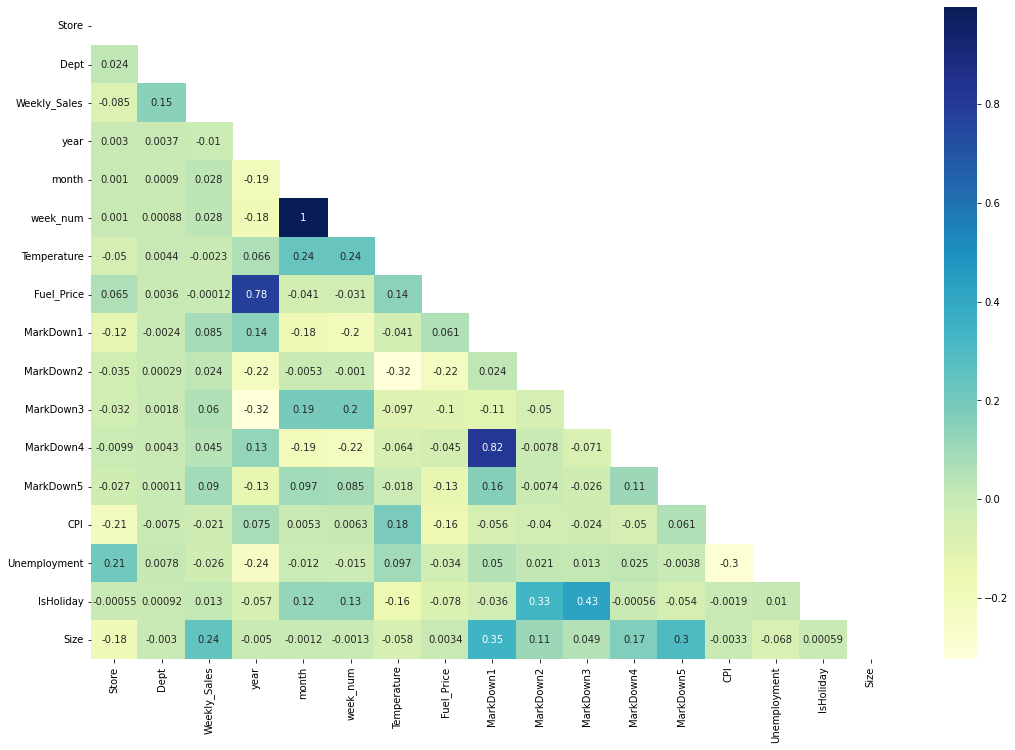

In [ ]:
corr =tfd.corr()

fig, ax = plt.subplots(figsize = (18, 12))
corr_plot = sns.heatmap(corr, annot = True, mask = np.triu(corr),cmap='YlGnBu')

plt.show()

In [ ]:
tfd.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
year,421570.0,2010.968591,0.796876,2010.000,2010.000000,2011.00000,2012.000000,2012.000000
month,421570.0,6.449510,3.243217,1.000,4.000000,6.00000,9.000000,12.000000
week_num,421570.0,25.826762,14.151887,1.000,14.000000,26.00000,38.000000,52.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000


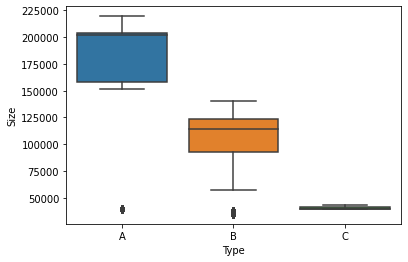

In [ ]:
size_per_type = sns.boxplot(data = tfd, x = 'Type', y = 'Size') #BOXPLOT- inference variation of type with size

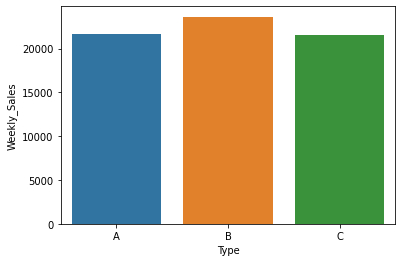

In [ ]:
store_sale = pd.concat([stores['Type'], tfd['Weekly_Sales']], axis=1)
weekly_sales_per_type = sns.barplot(data = store_sale, x = 'Type', y = 'Weekly_Sales',ci=None,estimator=np.mean)


Getting Store-wise weekly sales visualization

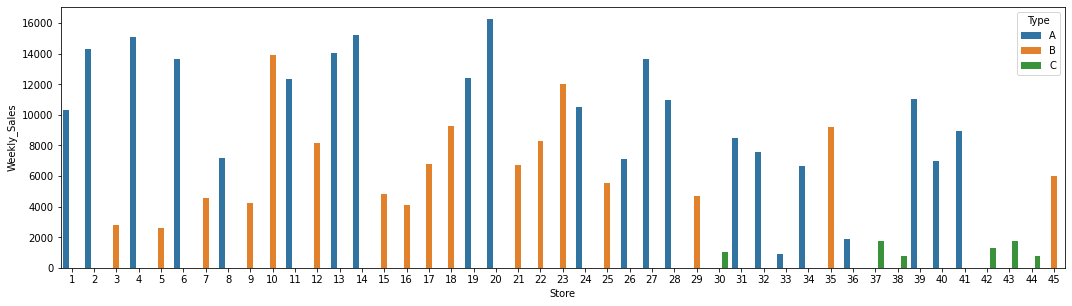

In [ ]:
fig, ax = plt.subplots(figsize = (18, 4.8))

weekly_sales_per_store = sns.barplot(data = tfd,
                                     x = 'Store', y = 'Weekly_Sales', hue = 'Type',
                                     estimator = np.median,ci=None
                                    )


Type wise weekly_sales data

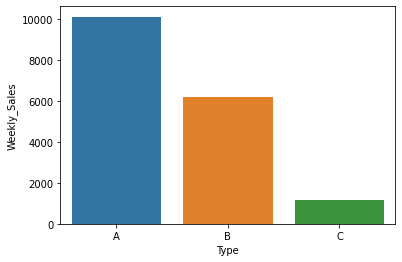

In [ ]:
weekly_sales_per_type = sns.barplot(data = tfd, x = 'Type', y = 'Weekly_Sales',ci=None,estimator=np.median)
sns.barplot?

visualization of random store vs weekly sales data


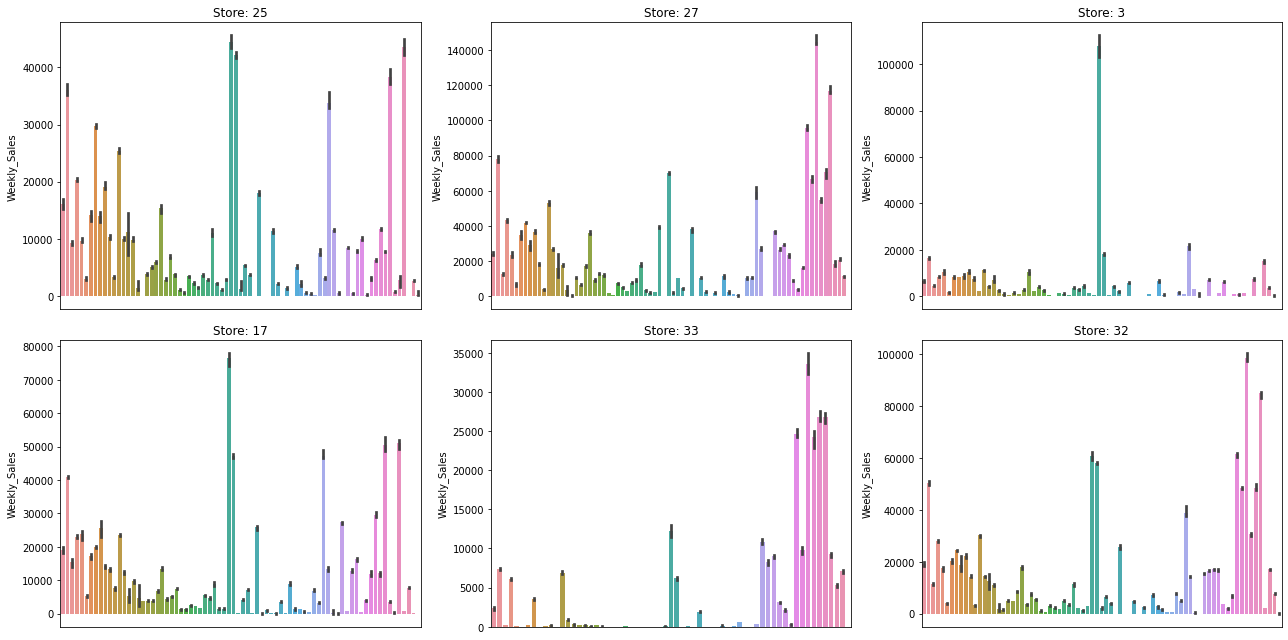

In [ ]:
#visualization of random store vs weekly sales data
nrows = 2
ncols = 3

fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (18, 9))
unique_store = tfd['Store'].unique()

random.seed(0)
indices = random.sample(range(len(unique_store)), 6)
count = 0
for i in indices:
    curr_store = unique_store[i]
    weekly_sales_per_dept = sns.barplot(data = tfd[tfd['Store'] == curr_store],
                                        x = 'Dept', y = 'Weekly_Sales',
                                        estimator = np.median,
                                        ax = ax[count // ncols, count % ncols],
                                       ).set_title('Store: ' + str(curr_store))
    ax[count // ncols, count % ncols].get_xaxis().set_visible(False)
    count += 1
    
plt.tight_layout()
plt.show()

In [ ]:
tfd['hol_num'] = tfd['IsHoliday'].apply(lambda x: 0 if x is False else 1 if x is True else x) #encoding is holiday with number so that it can be used as an input
tfd['Type_num'] = tfd.Type.astype('category').cat.codes


In [ ]:
testfd['hol_num'] = testfd['IsHoliday'].apply(lambda x: 0 if x is False else 1 if x is True else x)
testfd['Type_num'] = testfd.Type.astype('category').cat.codes

In [ ]:
testfd

,Store,Dept,Date,year,month,year_month,week_num,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,hol_num,Type_num
0,1,1,2012-11-02,2012,11,2012-11,44,55.32,3.386,6766.44,...,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,0,0
1,1,1,2012-11-09,2012,11,2012-11,45,61.24,3.314,11421.32,...,40.28,4646.79,6154.16,223.481307,6.573,False,A,151315,0,0
2,1,1,2012-11-16,2012,11,2012-11,46,52.92,3.252,9696.28,...,103.78,1133.15,6612.69,223.512911,6.573,False,A,151315,0,0
3,1,1,2012-11-23,2012,11,2012-11,47,56.23,3.211,883.59,...,74910.32,209.91,303.32,223.561947,6.573,True,A,151315,1,0
4,1,1,2012-11-30,2012,11,2012-11,48,52.34,3.207,2460.03,...,3838.35,150.57,6966.34,223.610984,6.573,False,A,151315,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,2013,6,2013-06,26,76.05,3.639,4842.29,...,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,0,1
115060,45,98,2013-07-05,2013,7,2013-07,27,77.50,3.614,9090.48,...,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,0,1
115061,45,98,2013-07-12,2013,7,2013-07,28,79.37,3.614,3789.94,...,85.72,744.84,2150.36,NaN,NaN,False,B,118221,0,1
115062,45,98,2013-07-19,2013,7,2013-07,29,82.84,3.737,2961.49,...,204.19,363.00,1059.46,NaN,NaN,False,B,118221,0,1


In [ ]:
tfd.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   year          421570 non-null  int64         
 5   month         421570 non-null  int64         
 6   year_month    421570 non-null  period[M]     
 7   week_num      421570 non-null  int64         
 8   Temperature   421570 non-null  float64       
 9   Fuel_Price    421570 non-null  float64       
 10  MarkDown1     150681 non-null  float64       
 11  MarkDown2     111248 non-null  float64       
 12  MarkDown3     137091 non-null  float64       
 13  MarkDown4     134967 non-null  float64       
 14  MarkDown5     151432 non-null  float64       
 15  CPI           421

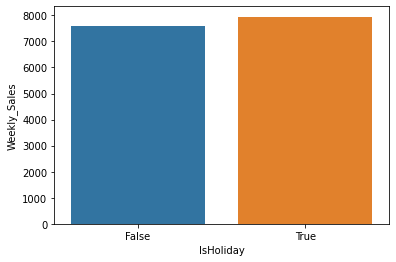

In [ ]:
weekly_sales_holiday = sns.barplot(data = tfd,
                                   x = 'IsHoliday', y = 'Weekly_Sales',
                                   estimator = np.median,ci=None
                                  )
#checking effect of weekly sales with holiday 

In [ ]:
tfd['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'IsHoliday')

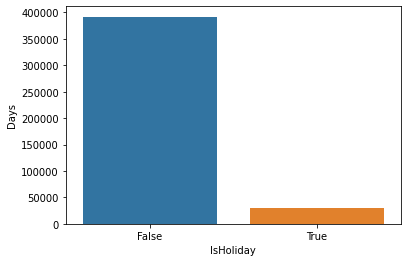

In [ ]:
No_of_holidays=[tfd['IsHoliday'].value_counts()[0],tfd['IsHoliday'].value_counts()[1]]
Holiday=['False','True']
sns.barplot(Holiday,No_of_holidays)
plt.ylabel('Days')
plt.xlabel('IsHoliday')
#below is a comparitive analysis on the number of days vs that of isholiday

Below we see effect of different features with respect to time

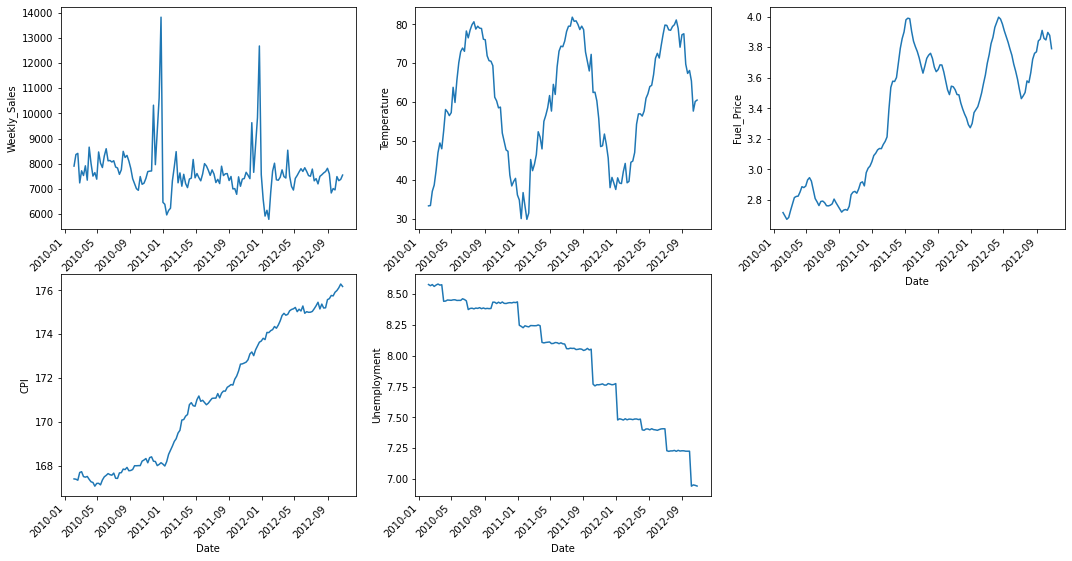

In [ ]:
ts_col = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


nrows = 2
ncols = 3

fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (18, 9))

count = 0
for ts in ts_col:
    if count == 0:
        ts = sns.lineplot(data = tfd,
            x = 'Date', y = ts,
            ax = ax[count // ncols, count % ncols],
            estimator = np.median,ci=None)
    else:
        ts = sns.lineplot(data = tfd,
        x = 'Date', y = ts,
        ax = ax[count // ncols, count % ncols],
        estimator = np.mean,ci=None)
    plt.setp(ax[count // ncols, count % ncols].get_xticklabels(), rotation=45, horizontalalignment='right')
    count += 1

ax[nrows - 1, ncols - 1].set_axis_off()
plt.show()

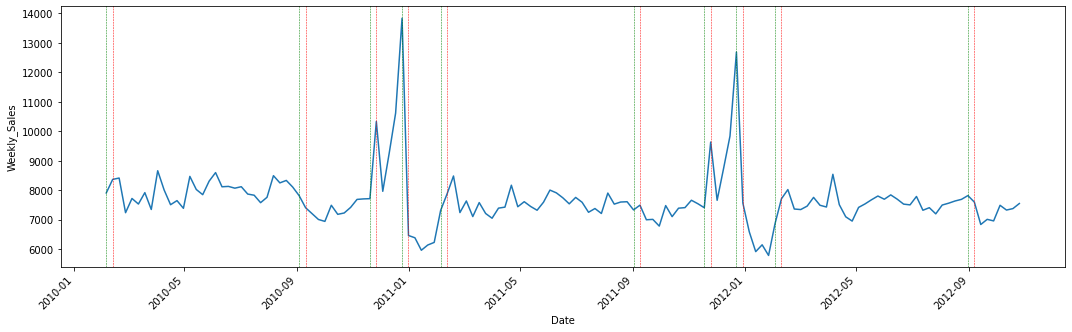

In [ ]:
fig, ax = plt.subplots(figsize = (18, 4.8))

ts_weekly_sales = sns.lineplot(data = tfd,
                               x = 'Date', y = 'Weekly_Sales',
                               estimator = np.median,
                               ax = ax,ci=None)

for date in tfd[tfd['IsHoliday'] == 1]['Date'].unique():
    plt.axvline(date, 0, 20000,
                linewidth = 0.5, linestyle = '--', color = 'red')
    plt.axvline(date - np.timedelta64(7, 'D'), 0, 20000,
                linewidth = 0.5, linestyle = '--', color = 'green')
    
plt.setp(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()
#the lines shows the seasonal chunks

In [ ]:
tfd_fil =tfd.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5', 
          'Unemployment', 'CPI', 'IsHoliday', 'Type', 'Temperature', 'Fuel_Price','year_month'], axis = 1)
tfd_fil = tfd_fil[['Date', 'Store', 'Dept','year','month','week_num','hol_num','Size','Type_num','Weekly_Sales']]
#final version of our train dataset
tfd_fil.head(5)

,Date,Store,Dept,year,month,week_num,hol_num,Size,Type_num,Weekly_Sales
0,2010-02-05,1,1,2010,2,5,0,151315,0,24924.50
1,2010-02-12,1,1,2010,2,6,1,151315,0,46039.49
2,2010-02-19,1,1,2010,2,7,0,151315,0,41595.55
3,2010-02-26,1,1,2010,2,8,0,151315,0,19403.54
4,2010-03-05,1,1,2010,3,9,0,151315,0,21827.90


In [ ]:
testfd_fil =testfd.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5', 
          'Unemployment', 'CPI', 'IsHoliday', 'Type', 'Temperature', 'Fuel_Price','year_month'], axis = 1)
testfd_fil = testfd_fil[['Date', 'Store', 'Dept','year','month','week_num','hol_num','Size','Type_num']]
#final version of our train dataset
testfd_fil.head(5)

,Date,Store,Dept,year,month,week_num,hol_num,Size,Type_num
0,2012-11-02,1,1,2012,11,44,0,151315,0
1,2012-11-09,1,1,2012,11,45,0,151315,0
2,2012-11-16,1,1,2012,11,46,0,151315,0
3,2012-11-23,1,1,2012,11,47,1,151315,0
4,2012-11-30,1,1,2012,11,48,0,151315,0


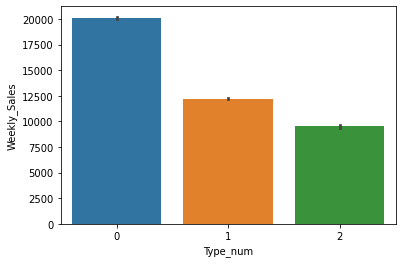

In [ ]:
weekly_sales_per_type = sns.barplot(data = tfd, x = 'Type_num', y = 'Weekly_Sales')

In [ ]:
print(test.Date.nunique())


39


In [ ]:
holiday_data = tfd.loc[:, ['Weekly_Sales', 'IsHoliday', 'month']]

holiday_data.loc[holiday_data.loc[:, 'IsHoliday'] == 0, 'IsHoliday'] = 'Non-Holiday'
holiday_data.loc[(holiday_data.loc[:, 'IsHoliday'] == 1) & (holiday_data.loc[:, 'month'] == 2), 'IsHoliday'] = 'Super Bowl'
holiday_data.loc[(holiday_data.loc[:, 'IsHoliday'] == 1) & (holiday_data.loc[:, 'month'] == 9), 'IsHoliday'] = 'Labor Day'
holiday_data.loc[(holiday_data.loc[:, 'IsHoliday'] == 1) & (holiday_data.loc[:, 'month'] == 11), 'IsHoliday'] = 'Thanksgiving'
holiday_data.loc[(holiday_data.loc[:, 'IsHoliday'] == 1) & (holiday_data.loc[:, 'month'] == 12), 'IsHoliday'] = 'Christmas'

holiday_data.head()

,Weekly_Sales,IsHoliday,month
0,24924.50,Non-Holiday,2
1,46039.49,Super Bowl,2
2,41595.55,Non-Holiday,2
3,19403.54,Non-Holiday,2
4,21827.90,Non-Holiday,3


Type of holiday vs weekly sales

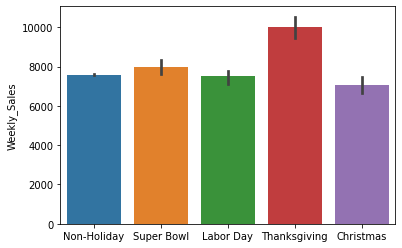

In [ ]:
fig, ax = plt.subplots()

weekly_sales_holiday = sns.barplot(data = holiday_data,
                                   x = 'IsHoliday', y = 'Weekly_Sales',
                                   estimator = np.median,
                                   ax = ax,
                                  )
ax.set(xlabel = None)
plt.show()


Random Forest forecasting

Spliting and scaling the values

In [ ]:

from sklearn.model_selection import train_test_split

tfd_fil_A=tfd_fil[tfd_fil['Type_num']==0]
all_train = tfd_fil_A[tfd_fil_A.Date<'2011-11-01']
all_test = tfd_fil_A[tfd_fil_A.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)

In [ ]:
X_train

,Store,Dept,year,month,week_num,hol_num,Size,Type_num
0,1,1,2010,2,5,0,151315,0
1,1,1,2010,2,6,1,151315,0
2,1,1,2010,2,7,0,151315,0
3,1,1,2010,2,8,0,151315,0
4,1,1,2010,3,9,0,151315,0
...,...,...,...,...,...,...,...,...
391021,41,99,2011,6,24,0,196321,0
391022,41,99,2011,8,33,0,196321,0
391023,41,99,2011,8,34,0,196321,0
391024,41,99,2011,9,35,0,196321,0


Using Random Forest Regressor algorithm and finding error using RMSE and R-squared error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import  r2_score

clf_A = RandomForestRegressor(n_estimators=100, max_samples = 0.4)
clf_A.fit(X_train_sc, y_train)
clf_pred = clf_A.predict(X_test_sc)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, clf_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))))

print('R2 Score:', r2_score(y_test, clf_pred))

Mean Absolute Error: 2142.929376985772
Root Mean Squared Error: 4468
R2 Score: 0.9728649490234802


In [ ]:
sum(np.abs(clf_pred- y_test))/sum(clf_pred)

0.10679319131014205

In [ ]:
rf_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_rf_pred': clf_pred}, index = y_test.index)
rf_pred_df_A = pd.merge(rf_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')

In [ ]:
rf_pred_df_A.head(20)

,Weekly_Sales,Weekly_Sales_rf_pred,Date,Store,Dept
91,39886.06,29230.7492,2011-11-04,1,1
92,18689.54,24477.2901,2011-11-11,1,1
93,19050.66,23501.0874,2011-11-18,1,1
94,20911.25,22908.9653,2011-11-25,1,1
95,25293.49,28212.7762,2011-12-02,1,1
96,33305.92,31338.6053,2011-12-09,1,1
97,45773.03,39840.9515,2011-12-16,1,1
98,46788.75,46411.8439,2011-12-23,1,1
99,23350.88,31745.7008,2011-12-30,1,1
100,16567.69,18975.9077,2012-01-06,1,1


prediction for type A ---->

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


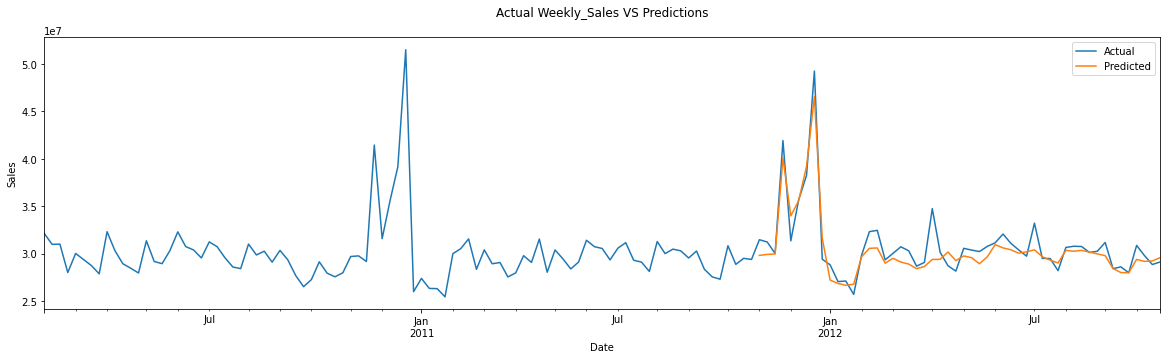

In [ ]:
pred_g = rf_pred_df_A.groupby('Date')['Weekly_Sales','Weekly_Sales_rf_pred'].sum()
act_g = tfd_fil_A.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_rf_pred'].plot(legend = True)


threshold_date = tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions\n ');

In [ ]:
testfd_fil_A=testfd_fil[testfd_fil['Type_num']==0]

In [ ]:
tfd_fil_A

,Date,Store,Dept,year,month,week_num,hol_num,Size,Type_num,Weekly_Sales
0,2010-02-05,1,1,2010,2,5,0,151315,0,24924.50
1,2010-02-12,1,1,2010,2,6,1,151315,0,46039.49
2,2010-02-19,1,1,2010,2,7,0,151315,0,41595.55
3,2010-02-26,1,1,2010,2,8,0,151315,0,19403.54
4,2010-03-05,1,1,2010,3,9,0,151315,0,21827.90
...,...,...,...,...,...,...,...,...,...,...
391055,2012-09-14,41,99,2012,9,37,0,196321,0,0.10
391056,2012-09-21,41,99,2012,9,38,0,196321,0,0.08
391057,2012-10-05,41,99,2012,10,40,0,196321,0,934.88
391058,2012-10-12,41,99,2012,10,41,0,196321,0,230.03


In [ ]:
testfd_fil_A

,Date,Store,Dept,year,month,week_num,hol_num,Size,Type_num
0,2012-11-02,1,1,2012,11,44,0,151315,0
1,2012-11-09,1,1,2012,11,45,0,151315,0
2,2012-11-16,1,1,2012,11,46,0,151315,0
3,2012-11-23,1,1,2012,11,47,1,151315,0
4,2012-11-30,1,1,2012,11,48,0,151315,0
...,...,...,...,...,...,...,...,...,...
106536,2013-06-07,41,99,2013,6,23,0,196321,0
106537,2013-06-14,41,99,2013,6,24,0,196321,0
106538,2013-07-05,41,99,2013,7,27,0,196321,0
106539,2013-07-19,41,99,2013,7,29,0,196321,0


In [ ]:
test_A=testfd_fil_A.drop('Date',axis=1)

In [ ]:
test_A_sc=mms.fit_transform(test_A)

In [ ]:
A_pred=clf_A.predict(test_A_sc)

In [ ]:
#@title Default title text
A_pred

array([29141.2294, 23811.2832, 22749.6088, ...,   142.1025,   175.6715,
         175.6715])

In [ ]:
predictions = pd.DataFrame({'Weekly_Sales': A_pred})
model_final = pd.concat([testfd_fil_A, predictions], axis = 1)
model_final=model_final.dropna()

In [ ]:
model_final

,Date,Store,Dept,year,month,week_num,hol_num,Size,Type_num,Weekly_Sales
0,2012-11-02,1.0,1.0,2012.0,11.0,44.0,0.0,151315.0,0.0,29141.2294
1,2012-11-09,1.0,1.0,2012.0,11.0,45.0,0.0,151315.0,0.0,23811.2832
2,2012-11-16,1.0,1.0,2012.0,11.0,46.0,0.0,151315.0,0.0,22749.6088
3,2012-11-23,1.0,1.0,2012.0,11.0,47.0,1.0,151315.0,0.0,22248.5194
4,2012-11-30,1.0,1.0,2012.0,11.0,48.0,0.0,151315.0,0.0,24079.4851
...,...,...,...,...,...,...,...,...,...,...
53857,2013-06-21,20.0,99.0,2013.0,6.0,25.0,0.0,203742.0,0.0,1320.6758
53858,2013-07-05,20.0,99.0,2013.0,7.0,27.0,0.0,203742.0,0.0,2344.7622
53859,2013-07-12,20.0,99.0,2013.0,7.0,28.0,0.0,203742.0,0.0,6291.1247
53860,2013-07-19,20.0,99.0,2013.0,7.0,29.0,0.0,203742.0,0.0,5821.9847


In [ ]:
model_final['Date'].nunique

<bound method IndexOpsMixin.nunique of 0       2012-11-02
1       2012-11-09
2       2012-11-16
3       2012-11-23
4       2012-11-30
           ...    
53857   2013-06-21
53858   2013-07-05
53859   2013-07-12
53860   2013-07-19
53861   2013-07-26
Name: Date, Length: 27741, dtype: datetime64[ns]>

*Future* sales prediction

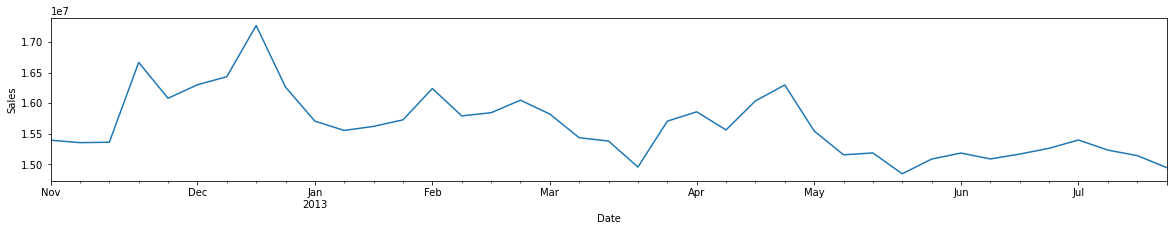

In [ ]:
ov_sales = model_final.groupby('Date').Weekly_Sales.sum()
plt.ylabel('Sales')
ov_sales.plot(figsize = (20,3))

Splitting and Scaling for Type B

In [ ]:
from sklearn.model_selection import train_test_split

tfd_fil_B=tfd_fil[tfd_fil['Type_num']==1]
all_train = tfd_fil_B[tfd_fil_B.Date<'2011-11-01']
all_test = tfd_fil_B[tfd_fil_B.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import  r2_score

clf = RandomForestRegressor(n_estimators=100, max_samples = 0.4)
clf.fit(X_train_sc, y_train)
clf_pred = clf.predict(X_test_sc)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, clf_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))))
print('R2 Score:', r2_score(y_test, clf_pred))
sum(np.abs(clf_pred- y_test))/sum(clf_pred)

Mean Absolute Error: 1637.277499133252
Root Mean Squared Error: 4067
R2 Score: 0.9457036046370366


0.1344242912261893

In [ ]:
rf_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_rf_pred': clf_pred}, index = y_test.index)
rf_pred_df_B = pd.merge(rf_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')

In [ ]:

rf_pred_df_B.head(20)

,Weekly_Sales,Weekly_Sales_rf_pred,Date,Store,Dept
20573,15836.73,10882.0116,2011-11-04,3,1
20574,6525.18,9187.2995,2011-11-11,3,1
20575,7350.22,8147.3945,2011-11-18,3,1
20576,6912.38,8074.0784,2011-11-25,3,1
20577,9251.40,8707.6801,2011-12-02,3,1
20578,10485.08,9582.5138,2011-12-09,3,1
20579,15210.07,11111.6121,2011-12-16,3,1
20580,12332.52,11045.4652,2011-12-23,3,1
20581,7793.74,9209.8753,2011-12-30,3,1
20582,6361.95,5638.3738,2012-01-06,3,1


RANDOM FOREST PREDICTION ON TYPE B

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


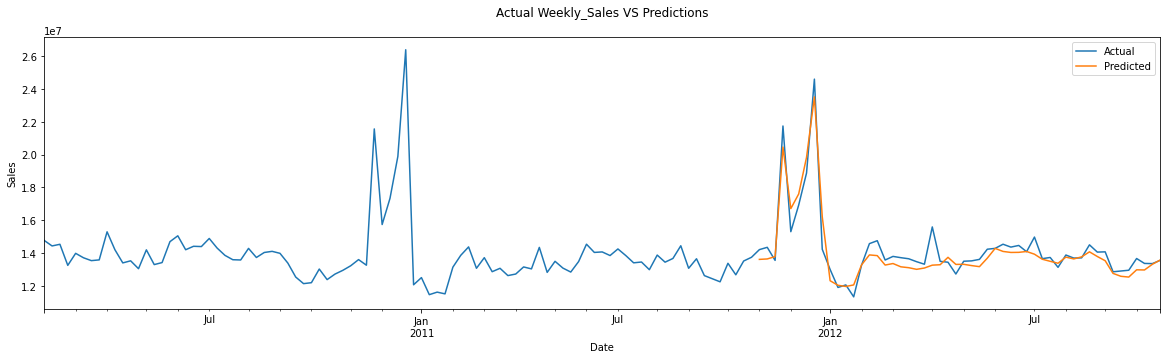

In [ ]:
pred_g = rf_pred_df_B.groupby('Date')['Weekly_Sales','Weekly_Sales_rf_pred'].sum()
act_g = tfd_fil_B.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_rf_pred'].plot(legend = True)


threshold_date = tfd_fil_B[tfd_fil_B.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil_B[tfd_fil_B.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions\n ');

In [ ]:

testfd_fil_B=testfd_fil[testfd_fil['Type_num']==1]
test_B=testfd_fil_B.drop('Date',axis=1)
test_B_sc=mms.fit_transform(test_B)
B_pred=clf.predict(test_B_sc)
predictions = pd.DataFrame({'Weekly_Sales': B_pred})
model_final = pd.concat([testfd_fil_B, predictions], axis = 1)[[ 'Date', 'Weekly_Sales']]
model_final=model_final.dropna()

In [ ]:
model_final.head()

,Date,Weekly_Sales
5580,2012-11-02,48.1891
5581,2012-11-09,48.3549
5582,2012-11-16,48.1543
5583,2012-11-23,102.8319
5584,2012-11-30,132.7714


FUTURE PREDICTIONS ----> TYPE B

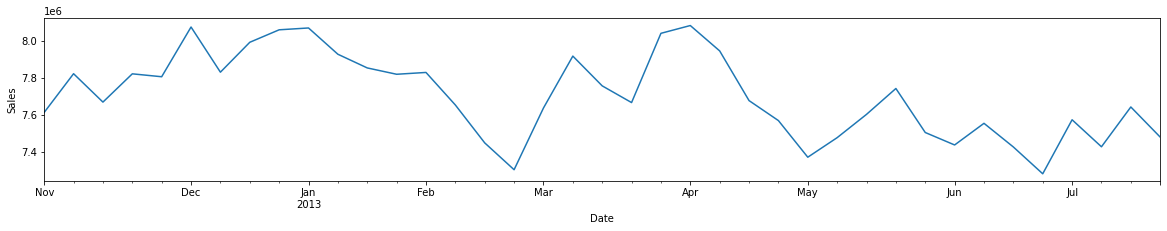

In [ ]:
ov_sales = model_final.groupby('Date').Weekly_Sales.sum()
plt.ylabel('Sales')
ov_sales.plot(figsize = (20,3))

In [ ]:
ov_sales

Date
2012-11-02    7.614861e+06
2012-11-09    7.824304e+06
2012-11-16    7.670664e+06
2012-11-23    7.823651e+06
2012-11-30    7.807916e+06
                  ...     
2013-06-28    7.282577e+06
2013-07-05    7.574971e+06
2013-07-12    7.428811e+06
2013-07-19    7.644236e+06
2013-07-26    7.481214e+06
Name: Weekly_Sales, Length: 39, dtype: float64

Train test splitting and scaling

In [ ]:
from sklearn.model_selection import train_test_split

tfd_fil_C=tfd_fil[tfd_fil['Type_num']==2]
all_train = tfd_fil_C[tfd_fil_C.Date<'2011-11-01']
all_test = tfd_fil_C[tfd_fil_C.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import  r2_score

clf = RandomForestRegressor(n_estimators=100, max_samples = 0.4)
clf.fit(X_train_sc, y_train)
clf_pred = clf.predict(X_test_sc)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, clf_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))))
print('R2 Score:', r2_score(y_test, clf_pred))
sum(np.abs(clf_pred- y_test))/sum(clf_pred)

Mean Absolute Error: 865.166574946406
Root Mean Squared Error: 2443
R2 Score: 0.9777964370085833


0.09465763372107305

In [ ]:
rf_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_rf_pred': clf_pred}, index = y_test.index)
rf_pred_df_C = pd.merge(rf_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')

In [ ]:
rf_pred_df_C

,Weekly_Sales,Weekly_Sales_rf_pred,Date,Store,Dept
286639,21790.21,16988.8234,2011-11-04,30,1
286640,7541.74,12100.4903,2011-11-11,30,1
286641,7961.22,9986.6716,2011-11-18,30,1
286642,7996.47,9429.3205,2011-11-25,30,1
286643,8797.14,10767.9215,2011-12-02,30,1
...,...,...,...,...,...
411926,3429.31,3066.9132,2012-09-28,44,98
411927,3852.34,3233.2840,2012-10-05,44,98
411928,3985.67,3312.4528,2012-10-12,44,98
411929,4233.10,3498.3652,2012-10-19,44,98


Prediction of weekly sales of type C

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


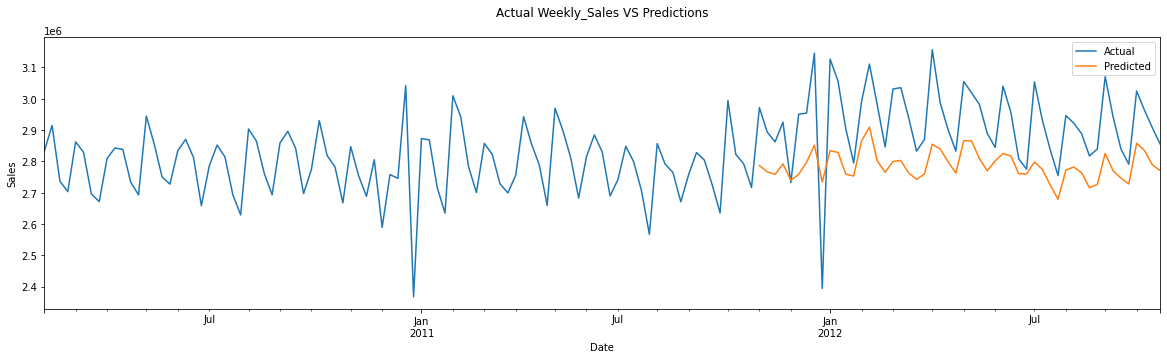

In [ ]:


pred_g = rf_pred_df_C.groupby('Date')['Weekly_Sales','Weekly_Sales_rf_pred'].sum()
act_g = tfd_fil_C.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_rf_pred'].plot(legend = True)


threshold_date = tfd_fil_C[tfd_fil_C.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil_C[tfd_fil_C.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions\n ');

In [ ]:
# testfd_fil_C=testfd_fil[testfd_fil['Type_num']==2]
# test_C=testfd_fil_C.drop('Date',axis=1)
# test_C_sc=mms.transform(test_C)
# C_pred=lgbm_model.predict(test_C_sc)
# predictions = pd.DataFrame({'Weekly_Sales': C_pred})
# model_final = pd.concat([testfd_fil_C, predictions], axis = 1)[[ 'Date', 'Weekly_Sales']]
# model_final=model_final.dropna()

In [ ]:
from sklearn.model_selection import train_test_split


all_train = tfd_fil[tfd_fil.Date<'2011-11-01']
all_test = tfd_fil[tfd_fil.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import  r2_score

clf = RandomForestRegressor(n_estimators=100, max_samples = 0.4)
clf.fit(X_train_sc, y_train)
clf_pred = clf.predict(X_test_sc)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, clf_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))))
print('R2 Score:', r2_score(y_test, clf_pred))
sum(np.abs(clf_pred- y_test))/sum(clf_pred)

Mean Absolute Error: 1824.3456699143708
Root Mean Squared Error: 4204
R2 Score: 0.9672480896861985


0.11487300395397033

In [ ]:
rf_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_rf_pred': clf_pred}, index = y_test.index)
rf_pred_df = pd.merge(rf_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


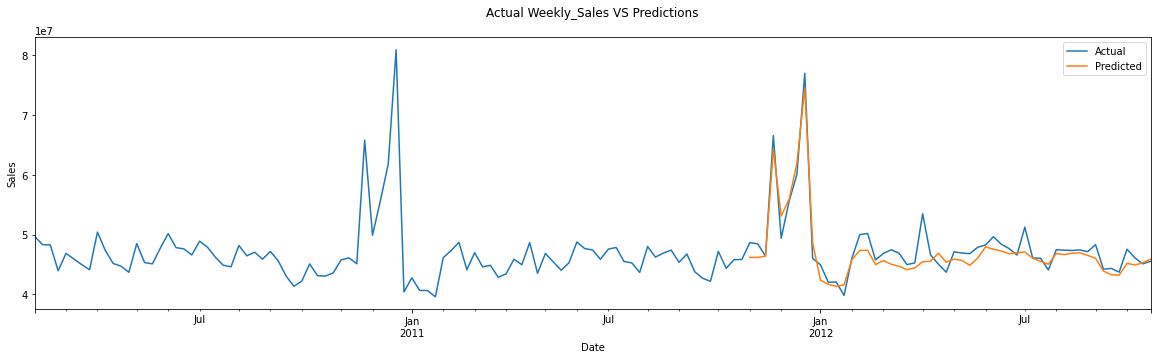

In [ ]:


pred_g = rf_pred_df.groupby('Date')['Weekly_Sales','Weekly_Sales_rf_pred'].sum()
act_g = tfd_fil.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_rf_pred'].plot(legend = True)


threshold_date = tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions\n ');

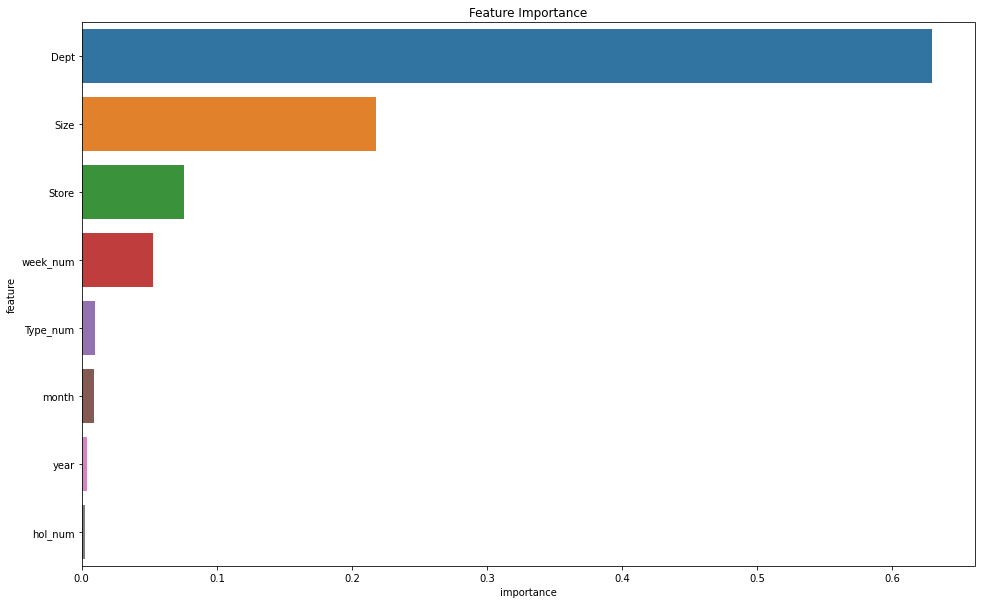

In [ ]:

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [ ]:
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
g_search.fit(X_train, y_train);

In [ ]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 9}


In [ ]:
from sklearn.model_selection import train_test_split


all_train = tfd_fil[tfd_fil.Date<'2011-11-01']
all_test = tfd_fil[tfd_fil.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import  r2_score

clf = RandomForestRegressor(bootstrap= 'True', max_depth= None, max_features= 'log2', n_estimators= 100,min_samples_leaf=1,
                              min_samples_split=3)
clf.fit(X_train_sc, y_train)
clf_pred = clf.predict(X_test_sc)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, clf_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))))
print('R2 Score:', r2_score(y_test, clf_pred))
sum(np.abs(clf_pred- y_test))/sum(clf_pred)

Mean Absolute Error: 2406.5386868433116
Root Mean Squared Error: 4726
R2 Score: 0.9586231086383656


0.1520281767523264

In [ ]:
rf_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_rf_pred': clf_pred}, index = y_test.index)
rf_pred_df = pd.merge(rf_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


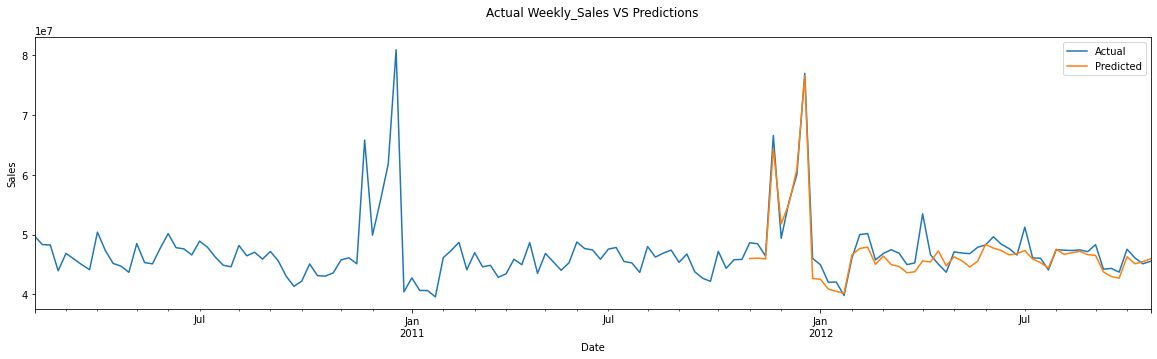

In [ ]:


pred_g = rf_pred_df.groupby('Date')['Weekly_Sales','Weekly_Sales_rf_pred'].sum()
act_g = tfd_fil.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_rf_pred'].plot(legend = True)


threshold_date = tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions\n ');

In [ ]:
from sklearn.model_selection import train_test_split

tfd_fil_A=tfd_fil[tfd_fil['Type_num']==0]
all_train = tfd_fil_A[tfd_fil_A.Date<'2011-11-01']
all_test = tfd_fil_A[tfd_fil_A.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import  r2_score

clf = RandomForestRegressor(bootstrap= 'True', max_depth= None, max_features= 'log2', n_estimators= 100,min_samples_leaf=1,
                              min_samples_split=3)
clf.fit(X_train_sc, y_train)
clf_pred = clf.predict(X_test_sc)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, clf_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))))
print('R2 Score:', r2_score(y_test, clf_pred))
sum(np.abs(clf_pred- y_test))/sum(clf_pred)

Mean Absolute Error: 2894.338990453407
Root Mean Squared Error: 5382
R2 Score: 0.9606226123203795


0.14474464219190747

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


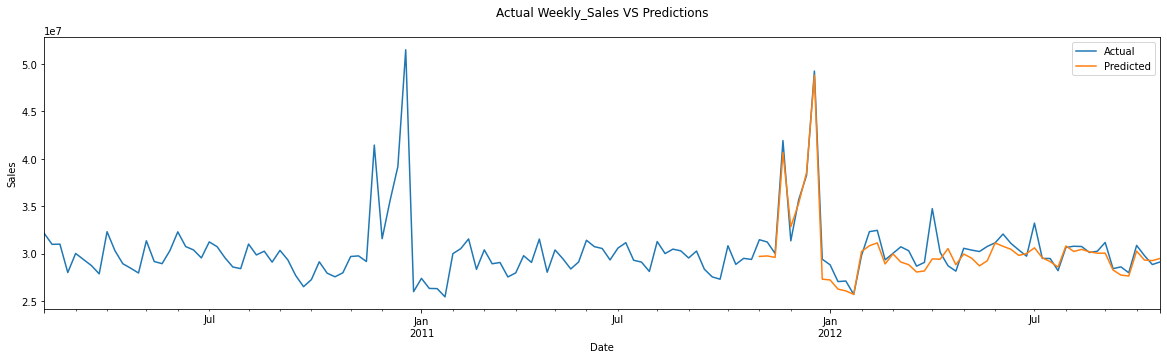

In [ ]:
rf_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_rf_pred': clf_pred}, index = y_test.index)
rf_pred_df = pd.merge(rf_pr, tfd_fil_A[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')


pred_g = rf_pred_df.groupby('Date')['Weekly_Sales','Weekly_Sales_rf_pred'].sum()
act_g = tfd_fil_A.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_rf_pred'].plot(legend = True)


threshold_date = tfd_fil_C[tfd_fil_C.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil_C[tfd_fil_C.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions\n ');

In [ ]:
from sklearn.model_selection import train_test_split

tfd_fil_B=tfd_fil[tfd_fil['Type_num']==1]
all_train = tfd_fil_B[tfd_fil_B.Date<'2011-11-01']
all_test = tfd_fil_B[tfd_fil_B.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import  r2_score

clf = RandomForestRegressor(bootstrap= 'True', max_depth= None, max_features= 'log2', n_estimators= 100,min_samples_leaf=1,
                              min_samples_split=3)
clf.fit(X_train_sc, y_train)
clf_pred = clf.predict(X_test_sc)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, clf_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))))
print('R2 Score:', r2_score(y_test, clf_pred))
sum(np.abs(clf_pred- y_test))/sum(clf_pred)

Mean Absolute Error: 2521.5037206143434
Root Mean Squared Error: 4933
R2 Score: 0.9201104497918955


0.20707519249695874

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


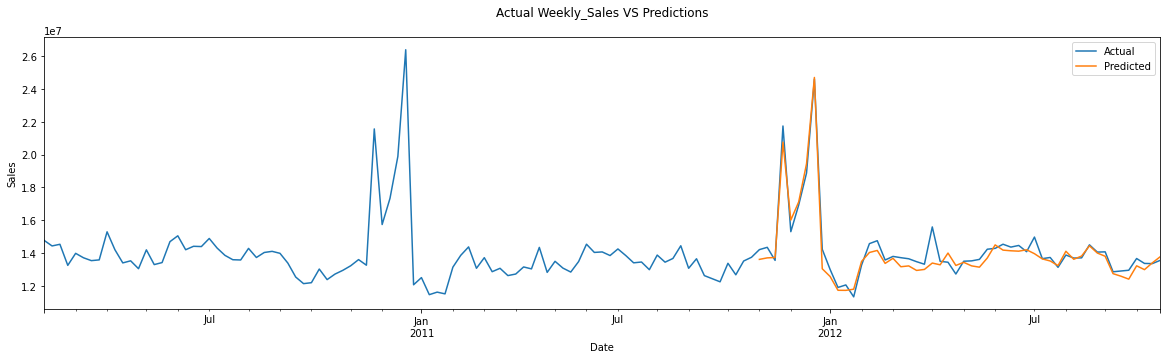

In [ ]:
rf_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_rf_pred': clf_pred}, index = y_test.index)
rf_pred_df = pd.merge(rf_pr, tfd_fil_B[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')


pred_g = rf_pred_df.groupby('Date')['Weekly_Sales','Weekly_Sales_rf_pred'].sum()
act_g = tfd_fil_B.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_rf_pred'].plot(legend = True)


threshold_date = tfd_fil_C[tfd_fil_C.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil_C[tfd_fil_C.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions\n ');

In [ ]:
from sklearn.model_selection import train_test_split

tfd_fil_C=tfd_fil[tfd_fil['Type_num']==2]
all_train = tfd_fil_C[tfd_fil_C.Date<'2011-11-01']
all_test = tfd_fil_C[tfd_fil_C.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import  r2_score

clf = RandomForestRegressor(bootstrap= 'True', max_depth= None, max_features= 'log2', n_estimators= 100,min_samples_leaf=1,
                              min_samples_split=3)
clf.fit(X_train_sc, y_train)
clf_pred = clf.predict(X_test_sc)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, clf_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, clf_pred))))
print('R2 Score:', r2_score(y_test, clf_pred))
sum(np.abs(clf_pred- y_test))/sum(clf_pred)

Mean Absolute Error: 1289.237833425412
Root Mean Squared Error: 2953
R2 Score: 0.9675503201040572


0.14081669290026894

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


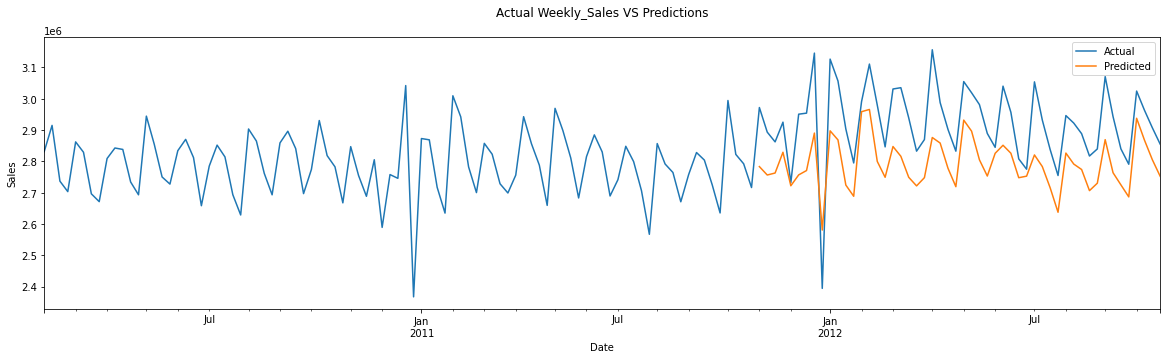

In [ ]:
rf_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_rf_pred': clf_pred}, index = y_test.index)
rf_pred_df = pd.merge(rf_pr, tfd_fil_C[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')


pred_g = rf_pred_df.groupby('Date')['Weekly_Sales','Weekly_Sales_rf_pred'].sum()
act_g = tfd_fil_C.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_rf_pred'].plot(legend = True)


threshold_date = tfd_fil_C[tfd_fil_C.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil_C[tfd_fil_C.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions\n ');

LSTM forecasting

In [ ]:
df_rnn = tfd_fil[['Date', 'Store', 'Dept', 'Weekly_Sales']]
df_rnn['Date'] = pd.to_datetime(df_rnn['Date'], format = '%Y-%m-%d')
df_rnn['Date'].freq = 'W-FRI'
df_rnn['Store_Dept_code'] = df_rnn.apply(lambda x: str(x['Store']) + '-' + str(x['Dept']), axis = 1)
df_rnn.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Store,Dept,Weekly_Sales,Store_Dept_code
0,2010-02-05,1,1,24924.50,1-1
1,2010-02-12,1,1,46039.49,1-1
2,2010-02-19,1,1,41595.55,1-1
3,2010-02-26,1,1,19403.54,1-1
4,2010-03-05,1,1,21827.90,1-1
5,2010-03-12,1,1,21043.39,1-1
6,2010-03-19,1,1,22136.64,1-1
7,2010-03-26,1,1,26229.21,1-1
8,2010-04-02,1,1,57258.43,1-1
9,2010-04-09,1,1,42960.91,1-1


In [ ]:
df_rnn_test = testfd_fil[['Date', 'Store', 'Dept']]
df_rnn_test['Date'] = pd.to_datetime(df_rnn_test['Date'], format = '%Y-%m-%d')
df_rnn_test['Date'].freq = 'W-FRI'
df_rnn_test['Store_Dept_code'] = df_rnn_test.apply(lambda x: str(x['Store']) + '-' + str(x['Dept']), axis = 1)
df_rnn_test.head(20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Store,Dept,Store_Dept_code
0,2012-11-02,1,1,1-1
1,2012-11-09,1,1,1-1
2,2012-11-16,1,1,1-1
3,2012-11-23,1,1,1-1
4,2012-11-30,1,1,1-1
5,2012-12-07,1,1,1-1
6,2012-12-14,1,1,1-1
7,2012-12-21,1,1,1-1
8,2012-12-28,1,1,1-1
9,2013-01-04,1,1,1-1


In [ ]:
df_rnn_piv = df_rnn.pivot_table(index = 'Date', columns = 'Store_Dept_code', values = 'Weekly_Sales')
df_rnn_piv =df_rnn_piv.fillna(0)
df_rnn_piv.head(2)

Store_Dept_code,1-1,1-10,1-11,1-12,1-13,1-14,1-16,1-17,1-18,1-19,...,9-9,9-90,9-91,9-92,9-93,9-94,9-95,9-96,9-97,9-98
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,30721.50,24213.18,8449.54,41969.29,19466.91,10217.55,13223.76,4729.5,1947.05,...,7245.32,2335.92,292.64,11620.09,0.0,0.0,23292.10,2438.08,668.48,0.0
2010-02-12,46039.49,31494.77,21760.75,8654.07,36476.40,18129.02,11873.89,13403.66,19006.5,1490.79,...,6556.94,2486.18,544.74,11080.50,0.0,982.5,22317.38,2304.09,766.93,0.0


In [ ]:
df_rnn_piv

Store_Dept_code,1-1,1-10,1-11,1-12,1-13,1-14,1-16,1-17,1-18,1-19,...,9-9,9-90,9-91,9-92,9-93,9-94,9-95,9-96,9-97,9-98
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,30721.50,24213.18,8449.54,41969.29,19466.91,10217.55,13223.76,4729.50,1947.05,...,7245.32,2335.92,292.64,11620.09,0.0,0.00,23292.10,2438.08,668.48,0.0
2010-02-12,46039.49,31494.77,21760.75,8654.07,36476.40,18129.02,11873.89,13403.66,19006.50,1490.79,...,6556.94,2486.18,544.74,11080.50,0.0,982.50,22317.38,2304.09,766.93,0.0
2010-02-19,41595.55,29634.13,18706.21,9165.98,37857.68,17491.36,13855.54,13485.61,17623.72,1722.17,...,7301.19,2452.70,424.26,10233.49,0.0,2163.75,20694.32,1944.11,607.02,0.0
2010-02-26,19403.54,27921.96,17306.61,9015.37,37467.32,16118.26,12881.02,10667.06,545.02,1655.32,...,7814.18,2386.49,470.43,10786.42,0.0,0.00,21780.08,2423.55,580.74,0.0
2010-03-05,21827.90,33299.27,19082.90,10239.06,40423.95,18268.78,17129.81,12657.65,634.61,1556.65,...,10540.89,2369.01,679.47,11176.21,0.0,0.00,22187.57,2591.28,371.05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,18947.81,27205.40,17242.78,11013.77,39793.41,12037.66,14734.64,7155.75,4867.70,1385.85,...,16044.45,3156.76,998.95,18333.69,0.0,0.00,33119.87,3763.21,0.00,0.0
2012-10-05,21904.47,27822.40,22374.18,10037.09,43746.89,14381.21,11320.41,9040.52,7291.46,1192.58,...,17044.07,2954.65,889.74,20612.82,0.0,158.98,35189.41,4306.43,0.00,0.0
2012-10-12,22764.01,27803.78,21857.09,8983.82,38015.36,11450.64,10525.66,7908.36,8171.79,1415.68,...,13830.42,3151.12,698.84,20285.74,0.0,3.88,32072.80,3675.99,0.00,0.0


Applying RNN based Architecture - Long Short Term Memory LSTM



In [ ]:
import tensorflow

In [ ]:
tensorflow.keras.__version__

'2.8.0'

In [ ]:
# import timeit
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# from tensorflow.keras.layers import Dense,LSTM
# from keras import layers

# #Main Timer
# start_time_main = timeit.default_timer()

# #Creating main prediction df
#     # identifying the test index once
# test_index = df_rnn_piv[df_rnn_piv.index>=threshold_date].index
# main_rnn_pred_df = pd.DataFrame(index = test_index)

# #threshold date
# threshold_date = pd.to_datetime(tfd_fil.Date.unique()[-test.Date.nunique()]).strftime('%Y-%m-%d')
# threshold_date
# sample_size = 150
# whole_range = df_rnn_piv.shape[1]

# samp = 0
# end = sample_size
# start = 0

# if (round(whole_range/sample_size)*sample_size)<whole_range:
#     extra = 1
# else:
#     extra = 0
    
# samples = round(whole_range/sample_size)+extra
# while samp<samples:
#     start_time = timeit.default_timer()
#     print(f"Working on Sample: [{start}:{end}]")
#     #print('start:',start,'end:',end )
 
#     # Train Test split
#     train_rnn = df_rnn_piv[df_rnn_piv.index<threshold_date].iloc[:,start:end]
#     test_rnn = df_rnn_piv[df_rnn_piv.index>=threshold_date].iloc[:,start:end]  
#     # Sampling for next round
#     samp = samp+1
#     start= start+sample_size
#     end = end+sample_size


#     # Scaling
#     mms = MinMaxScaler()
#     mms.fit(train_rnn)
#     X_train_sc = mms.transform(train_rnn)
#     X_test_sc = mms.transform(test_rnn)      #Generating the table
#     length  = 48
#     batch_size = 20 #Number of timeseries samples in each batch
#     generator = TimeseriesGenerator(X_train_sc, X_train_sc, length=length, batch_size=batch_size)
    
#         # define model
#     model = Sequential()
#     model.add(LSTM(128,activation= 'tanh',return_sequences=True, input_shape=(length,X_train_sc.shape[1])))
#     model.add(LSTM(64, activation='tanh', return_sequences = False))
#     model.add(Dense(X_train_sc.shape[1]))
#     model.compile(optimizer='adam', loss='mse')
    
#         # Model Training
#     validation_generator = TimeseriesGenerator(X_test_sc,X_test_sc, length=38, batch_size=batch_size)
#     model.fit(generator,epochs=160,
#                         validation_data=validation_generator, verbose=2)#,callbacks=[early_stop])n_features = X_train_sc.shape[1]
#     test_predictions = []
#     first_eval_batch = X_train_sc[:length]
#     current_batch = first_eval_batch.reshape((1, length, X_train_sc.shape[1]))

#     for i in range(len(test_rnn)):
    
#         # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
#         current_pred = model.predict(current_batch)[0]
#         # store prediction
#         test_predictions.append(current_pred) 
#         # update batch to now include prediction and drop first value
#         current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

#         # Creating prediction df
#     inv_test_pred = mms.inverse_transform(test_predictions)
#     pred_df = pd.DataFrame (data = inv_test_pred, columns =test_rnn.columns, index = test_rnn.index )
#     main_rnn_pred_df = pd.merge(main_rnn_pred_df,pred_df, right_index=True, left_index=True)
    

In [ ]:
# train_rnn

In [ ]:
# test_rnn

In [ ]:
# rnn_pred_trans = main_rnn_pred_df.stack().reset_index()
# rnn_pred_trans.columns = ['Date', 'Store_Dept_code', 'Weekly_Sales_Rnn']
# df_with_pred = pd.merge(df_rnn,rnn_pred_trans, right_on = ['Date', 'Store_Dept_code'], left_on=['Date', 'Store_Dept_code'], how = 'left')

In [ ]:
# df_with_pred[df_with_pred['Date']=='2011-12-02']

In [ ]:
# df_with_pred=df_with_pred.dropna()

In [ ]:
# df_with_pred1=df_with_pred.groupby('Date')['Weekly_Sales','Weekly_Sales_Rnn'].sum()

In [ ]:
# df_with_pred1

In [ ]:
# from sklearn import metrics
# from sklearn.metrics import  r2_score
# actual = df_with_pred[~df_with_pred.Weekly_Sales_Rnn.isnull()].Weekly_Sales
# predicted = df_with_pred[~df_with_pred.Weekly_Sales_Rnn.isnull()].Weekly_Sales_Rnn


# print('Mean Absolute Error:', metrics.mean_absolute_error(actual, predicted))
# print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(actual, predicted))))
# print('R2 Score:', r2_score(actual, predicted))

In [ ]:
# sum(np.abs(predicted- actual))/sum(predicted)

In [ ]:
# lstm_pr = pd.DataFrame({'Weekly_Sales':actual.values, 'Weekly_Sales_lstm_pred': predicted}, index = actual.index)
# lstm_pred_df = pd.merge(lstm_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')

In [ ]:
# lstm_pred_df #lstm predictions



```
# This is formatted as code
```

Prediction and valdation using LSTM

In [ ]:
# lstm_pred_df1=lstm_pred_df.groupby('Date')['Weekly_Sales','Weekly_Sales_lstm_pred'].sum()

In [ ]:
# lstm_pred_df1

In [ ]:
# pred_g = lstm_pred_df1.groupby('Date')['Weekly_Sales','Weekly_Sales_lstm_pred'].sum()
# act_g = tfd_fil.groupby('Date')['Weekly_Sales'].sum()

# ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
# pred_g['Weekly_Sales_lstm_pred'].plot(legend = True)


# threshold_date = tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
# end_date =tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
# plt.legend(["Actual", "Predicted"])
# plt.ylabel('Sales')
# plt.title(f'Actual Weekly_Sales VS Predictions\n between {threshold_date} and {end_date}');

In [ ]:
df_rnn = tfd_fil_A[['Date', 'Store', 'Dept', 'Weekly_Sales']]
df_rnn['Date'] = pd.to_datetime(df_rnn['Date'], format = '%Y-%m-%d')
df_rnn['Date'].freq = 'W-FRI'
df_rnn['Store_Dept_code'] = df_rnn.apply(lambda x: str(x['Store']) + '-' + str(x['Dept']), axis = 1)
df_rnn.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Store,Dept,Weekly_Sales,Store_Dept_code
0,2010-02-05,1,1,24924.50,1-1
1,2010-02-12,1,1,46039.49,1-1
2,2010-02-19,1,1,41595.55,1-1
3,2010-02-26,1,1,19403.54,1-1
4,2010-03-05,1,1,21827.90,1-1
5,2010-03-12,1,1,21043.39,1-1
6,2010-03-19,1,1,22136.64,1-1
7,2010-03-26,1,1,26229.21,1-1
8,2010-04-02,1,1,57258.43,1-1
9,2010-04-09,1,1,42960.91,1-1


In [ ]:
df_rnn_test = testfd_fil[['Date', 'Store', 'Dept']]
df_rnn_test['Date'] = pd.to_datetime(df_rnn_test['Date'], format = '%Y-%m-%d')
df_rnn_test['Date'].freq = 'W-FRI'
df_rnn_test['Store_Dept_code'] = df_rnn_test.apply(lambda x: str(x['Store']) + '-' + str(x['Dept']), axis = 1)
df_rnn_test.head(20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Store,Dept,Store_Dept_code
0,2012-11-02,1,1,1-1
1,2012-11-09,1,1,1-1
2,2012-11-16,1,1,1-1
3,2012-11-23,1,1,1-1
4,2012-11-30,1,1,1-1
5,2012-12-07,1,1,1-1
6,2012-12-14,1,1,1-1
7,2012-12-21,1,1,1-1
8,2012-12-28,1,1,1-1
9,2013-01-04,1,1,1-1


In [ ]:
df_rnn_piv = df_rnn.pivot_table(index = 'Date', columns = 'Store_Dept_code', values = 'Weekly_Sales')
df_rnn_piv =df_rnn_piv.fillna(0)
df_rnn_piv.head(2)

Store_Dept_code,1-1,1-10,1-11,1-12,1-13,1-14,1-16,1-17,1-18,1-19,...,8-90,8-91,8-92,8-93,8-94,8-95,8-96,8-97,8-98,8-99
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,30721.50,24213.18,8449.54,41969.29,19466.91,10217.55,13223.76,4729.5,1947.05,...,40125.20,33565.15,62183.21,23348.83,23358.61,60454.44,0.0,16478.69,6343.12,0.0
2010-02-12,46039.49,31494.77,21760.75,8654.07,36476.40,18129.02,11873.89,13403.66,19006.5,1490.79,...,41189.02,36590.37,66182.09,25199.83,28473.30,63383.89,0.0,17531.11,9944.22,0.0


In [ ]:
tfd_fil_A

,Date,Store,Dept,year,month,week_num,hol_num,Size,Type_num,Weekly_Sales
0,2010-02-05,1,1,2010,2,5,0,151315,0,24924.50
1,2010-02-12,1,1,2010,2,6,1,151315,0,46039.49
2,2010-02-19,1,1,2010,2,7,0,151315,0,41595.55
3,2010-02-26,1,1,2010,2,8,0,151315,0,19403.54
4,2010-03-05,1,1,2010,3,9,0,151315,0,21827.90
...,...,...,...,...,...,...,...,...,...,...
391055,2012-09-14,41,99,2012,9,37,0,196321,0,0.10
391056,2012-09-21,41,99,2012,9,38,0,196321,0,0.08
391057,2012-10-05,41,99,2012,10,40,0,196321,0,934.88
391058,2012-10-12,41,99,2012,10,41,0,196321,0,230.03


In [ ]:
test.Date

0        2012-11-02
1        2012-11-09
2        2012-11-16
3        2012-11-23
4        2012-11-30
            ...    
115059   2013-06-28
115060   2013-07-05
115061   2013-07-12
115062   2013-07-19
115063   2013-07-26
Name: Date, Length: 115064, dtype: datetime64[ns]

In [ ]:
import timeit
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense,LSTM
from keras import layers

#Main Timer
start_time_main = timeit.default_timer()

#Creating main prediction df
    # identifying the test index once
test_index = df_rnn_piv[df_rnn_piv.index>=threshold_date].index
main_rnn_pred_df = pd.DataFrame(index = test_index)

#threshold date
threshold_date = pd.to_datetime(tfd_fil_A.Date.unique()[-38]).strftime('%Y-%m-%d')
threshold_date
sample_size = 150
whole_range = df_rnn_piv.shape[1]

samp = 0
end = sample_size
start = 0

if (round(whole_range/sample_size)*sample_size)<whole_range:
    extra = 1
else:
    extra = 0
    
samples = round(whole_range/sample_size)+extra
while samp<samples:
    start_time = timeit.default_timer()
    print(f"Working on Sample: [{start}:{end}]")
    #print('start:',start,'end:',end )
 
    # Train Test split
    train_rnn = df_rnn_piv[df_rnn_piv.index<threshold_date].iloc[:,start:end]
    test_rnn = df_rnn_piv[df_rnn_piv.index>=threshold_date].iloc[:,start:end]  
    # Sampling for next round
    samp = samp+1
    start= start+sample_size
    end = end+sample_size


    # Scaling
    mms = MinMaxScaler()
    mms.fit(train_rnn)
    X_train_sc = mms.transform(train_rnn)
    X_test_sc = mms.transform(test_rnn)      #Generating the table
    length  = 48
    batch_size = 20 #Number of timeseries samples in each batch
    generator = TimeseriesGenerator(X_train_sc, X_train_sc, length=length, batch_size=batch_size)
    
        # define model
    model = Sequential()
    model.add(LSTM(128,activation= 'tanh',return_sequences=True, input_shape=(length,X_train_sc.shape[1])))
    model.add(LSTM(64, activation='tanh', return_sequences = False))
    model.add(Dense(X_train_sc.shape[1]))
    model.compile(optimizer='adam', loss='mse')
    
        # Model Training
    validation_generator = TimeseriesGenerator(X_test_sc,X_test_sc, length=20, batch_size=batch_size)
    model.fit(generator,epochs=160,
                        validation_data=validation_generator, verbose=2)#,callbacks=[early_stop])n_features = X_train_sc.shape[1]
    test_predictions = []
    first_eval_batch = X_train_sc[:length]
    current_batch = first_eval_batch.reshape((1, length, X_train_sc.shape[1]))

    for i in range(len(test_rnn)):
    
        # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
        current_pred = model.predict(current_batch)[0]
        # store prediction
        test_predictions.append(current_pred) 
        # update batch to now include prediction and drop first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

        # Creating prediction df
    inv_test_pred = mms.inverse_transform(test_predictions)
    pred_df = pd.DataFrame (data = inv_test_pred, columns =test_rnn.columns, index = test_rnn.index )
    main_rnn_pred_df = pd.merge(main_rnn_pred_df,pred_df, right_index=True, left_index=True)
    

Working on Sample: [0:150]
Epoch 1/160
3/3 - 5s - loss: 0.1379 - val_loss: 0.1191 - 5s/epoch - 2s/step
Epoch 2/160
3/3 - 0s - loss: 0.1063 - val_loss: 0.0960 - 305ms/epoch - 102ms/step
Epoch 3/160
3/3 - 0s - loss: 0.0838 - val_loss: 0.0739 - 287ms/epoch - 96ms/step
Epoch 4/160
3/3 - 0s - loss: 0.0653 - val_loss: 0.0548 - 314ms/epoch - 105ms/step
Epoch 5/160
3/3 - 0s - loss: 0.0514 - val_loss: 0.0422 - 290ms/epoch - 97ms/step
Epoch 6/160
3/3 - 0s - loss: 0.0424 - val_loss: 0.0344 - 291ms/epoch - 97ms/step
Epoch 7/160
3/3 - 0s - loss: 0.0374 - val_loss: 0.0309 - 322ms/epoch - 107ms/step
Epoch 8/160
3/3 - 0s - loss: 0.0347 - val_loss: 0.0290 - 281ms/epoch - 94ms/step
Epoch 9/160
3/3 - 0s - loss: 0.0333 - val_loss: 0.0277 - 298ms/epoch - 99ms/step
Epoch 10/160
3/3 - 0s - loss: 0.0326 - val_loss: 0.0274 - 312ms/epoch - 104ms/step
Epoch 11/160
3/3 - 0s - loss: 0.0325 - val_loss: 0.0276 - 289ms/epoch - 96ms/step
Epoch 12/160
3/3 - 0s - loss: 0.0319 - val_loss: 0.0278 - 292ms/epoch - 97ms/step

In [ ]:
rnn_pred_trans = main_rnn_pred_df.stack().reset_index()
rnn_pred_trans.columns = ['Date', 'Store_Dept_code', 'Weekly_Sales_Rnn']
df_with_pred = pd.merge(df_rnn,rnn_pred_trans, right_on = ['Date', 'Store_Dept_code'], left_on=['Date', 'Store_Dept_code'], how = 'left')

In [ ]:
df_with_pred

,Date,Store,Dept,Weekly_Sales,Store_Dept_code,Weekly_Sales_Rnn
0,2010-02-05,1,1,24924.50,1-1,NaN
1,2010-02-12,1,1,46039.49,1-1,NaN
2,2010-02-19,1,1,41595.55,1-1,NaN
3,2010-02-26,1,1,19403.54,1-1,NaN
4,2010-03-05,1,1,21827.90,1-1,NaN
...,...,...,...,...,...,...
215473,2012-09-14,41,99,0.10,41-99,238.299284
215474,2012-09-21,41,99,0.08,41-99,261.856226
215475,2012-10-05,41,99,934.88,41-99,144.254726
215476,2012-10-12,41,99,230.03,41-99,12.660340


In [ ]:
from sklearn import metrics
from sklearn.metrics import  r2_score
actual = df_with_pred[~df_with_pred.Weekly_Sales_Rnn.isnull()].Weekly_Sales
predicted = df_with_pred[~df_with_pred.Weekly_Sales_Rnn.isnull()].Weekly_Sales_Rnn


print('Mean Absolute Error:', metrics.mean_absolute_error(actual, predicted))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(actual, predicted))))
print('R2 Score:', r2_score(actual, predicted))

Mean Absolute Error: 3031.958295265555
Root Mean Squared Error: 5975
R2 Score: 0.9474927719540137


In [ ]:
sum(np.abs(predicted- actual))/sum(predicted)

0.15605470818363035

In [ ]:
df_with_pred=df_with_pred.dropna()

In [ ]:
df_with_pred

,Date,Store,Dept,Weekly_Sales,Store_Dept_code,Weekly_Sales_Rnn
105,2012-02-10,1,1,36988.49,1-1,16245.184263
106,2012-02-17,1,1,54060.10,1-1,15472.675306
107,2012-02-24,1,1,20124.22,1-1,15570.045848
108,2012-03-02,1,1,20113.03,1-1,18422.240435
109,2012-03-09,1,1,21140.07,1-1,27325.728054
...,...,...,...,...,...,...
215473,2012-09-14,41,99,0.10,41-99,238.299284
215474,2012-09-21,41,99,0.08,41-99,261.856226
215475,2012-10-05,41,99,934.88,41-99,144.254726
215476,2012-10-12,41,99,230.03,41-99,12.660340


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


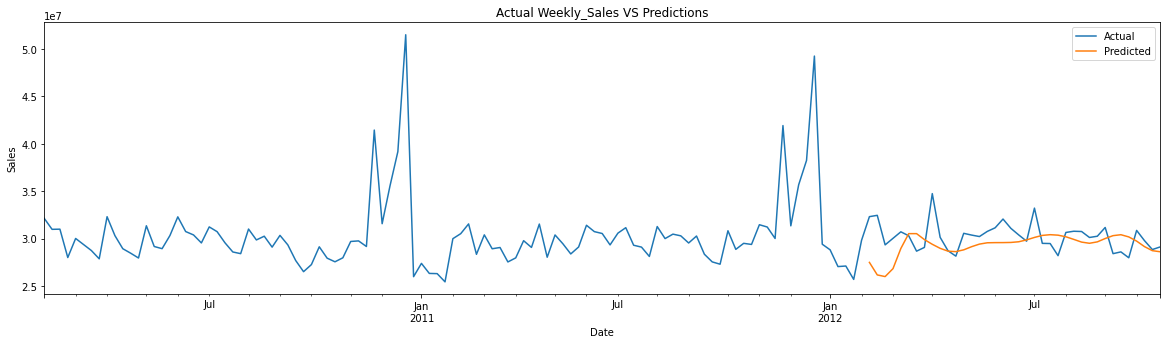

In [ ]:
# lstm_pr = pd.DataFrame({'Weekly_Sales':actual.values, 'Weekly_Sales_lstm_pred': predicted}, index = actual.index)
# lstm_pred_df = pd.merge(lstm_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')
# lstm_pred_df1=lstm_pred_df.groupby('Date')['Weekly_Sales','Weekly_Sales_lstm_pred'].sum()
pred_g = df_with_pred.groupby('Date')['Weekly_Sales','Weekly_Sales_Rnn'].sum()
act_g = tfd_fil_A.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_Rnn'].plot(legend = True)


threshold_date = tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions');

In [ ]:
df_rnn = tfd_fil_B[['Date', 'Store', 'Dept', 'Weekly_Sales']]
df_rnn['Date'] = pd.to_datetime(df_rnn['Date'], format = '%Y-%m-%d')
df_rnn['Date'].freq = 'W-FRI'
df_rnn['Store_Dept_code'] = df_rnn.apply(lambda x: str(x['Store']) + '-' + str(x['Dept']), axis = 1)
df_rnn_piv = df_rnn.pivot_table(index = 'Date', columns = 'Store_Dept_code', values = 'Weekly_Sales')
df_rnn_piv =df_rnn_piv.fillna(0)
import timeit
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense,LSTM
from keras import layers

#Main Timer
start_time_main = timeit.default_timer()

#Creating main prediction df
    # identifying the test index once
test_index = df_rnn_piv[df_rnn_piv.index>=threshold_date].index
main_rnn_pred_df = pd.DataFrame(index = test_index)

#threshold date
threshold_date = pd.to_datetime(tfd_fil_A.Date.unique()[-38]).strftime('%Y-%m-%d')
threshold_date
sample_size = 150
whole_range = df_rnn_piv.shape[1]

samp = 0
end = sample_size
start = 0

if (round(whole_range/sample_size)*sample_size)<whole_range:
    extra = 1
else:
    extra = 0
    
samples = round(whole_range/sample_size)+extra
while samp<samples:
    start_time = timeit.default_timer()
    print(f"Working on Sample: [{start}:{end}]")
    #print('start:',start,'end:',end )
 
    # Train Test split
    train_rnn = df_rnn_piv[df_rnn_piv.index<threshold_date].iloc[:,start:end]
    test_rnn = df_rnn_piv[df_rnn_piv.index>=threshold_date].iloc[:,start:end]  
    # Sampling for next round
    samp = samp+1
    start= start+sample_size
    end = end+sample_size


    # Scaling
    mms = MinMaxScaler()
    mms.fit(train_rnn)
    X_train_sc = mms.transform(train_rnn)
    X_test_sc = mms.transform(test_rnn)      #Generating the table
    length  = 48
    batch_size = 20 #Number of timeseries samples in each batch
    generator = TimeseriesGenerator(X_train_sc, X_train_sc, length=length, batch_size=batch_size)
    
        # define model
    model = Sequential()
    model.add(LSTM(128,activation= 'tanh',return_sequences=True, input_shape=(length,X_train_sc.shape[1])))
    model.add(LSTM(64, activation='tanh', return_sequences = False))
    model.add(Dense(X_train_sc.shape[1]))
    model.compile(optimizer='adam', loss='mse')
    
        # Model Training
    validation_generator = TimeseriesGenerator(X_test_sc,X_test_sc, length=20, batch_size=batch_size)
    model.fit(generator,epochs=160,
                        validation_data=validation_generator, verbose=2)#,callbacks=[early_stop])n_features = X_train_sc.shape[1]
    test_predictions = []
    first_eval_batch = X_train_sc[:length]
    current_batch = first_eval_batch.reshape((1, length, X_train_sc.shape[1]))

    for i in range(len(test_rnn)):
    
        # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
        current_pred = model.predict(current_batch)[0]
        # store prediction
        test_predictions.append(current_pred) 
        # update batch to now include prediction and drop first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

        # Creating prediction df
    inv_test_pred = mms.inverse_transform(test_predictions)
    pred_df = pd.DataFrame (data = inv_test_pred, columns =test_rnn.columns, index = test_rnn.index )
    main_rnn_pred_df = pd.merge(main_rnn_pred_df,pred_df, right_index=True, left_index=True)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Working on Sample: [0:150]
Epoch 1/160
3/3 - 5s - loss: 0.1462 - val_loss: 0.1529 - 5s/epoch - 2s/step
Epoch 2/160
3/3 - 0s - loss: 0.1174 - val_loss: 0.1337 - 304ms/epoch - 101ms/step
Epoch 3/160
3/3 - 0s - loss: 0.0978 - val_loss: 0.1153 - 288ms/epoch - 96ms/step
Epoch 4/160
3/3 - 0s - loss: 0.0798 - val_loss: 0.1002 - 297ms/epoch - 99ms/step
Epoch 5/160
3/3 - 0s - loss: 0.0651 - val_loss: 0.0878 - 296ms/epoch - 99ms/step
Epoch 6/160
3/3 - 0s - loss: 0.0530 - val_loss: 0.0786 - 286ms/epoch - 95ms/step
Epoch 7/160
3/3 - 0s - loss: 0.0439 - val_loss: 0.0734 - 299ms/epoch - 100ms/step
Epoch 8/160
3/3 - 0s - loss: 0.0381 - val_loss: 0.0702 - 298ms/epoch - 99ms/step
Epoch 9/160
3/3 - 0s - loss: 0.0347 - val_loss: 0.0693 - 296ms/epoch - 99ms/step
Epoch 10/160
3/3 - 0s - loss: 0.0334 - val_loss: 0.0701 - 302ms/epoch - 101ms/step
Epoch 11/160
3/3 - 0s - loss: 0.0326 - val_loss: 0.0703 - 287ms/epoch - 96ms/step
Epoch 12/160
3/3 - 0s - loss: 0.0323 - val_loss: 0.0704 - 286ms/epoch - 95ms/step


Mean Absolute Error: 2280.708640282691
Root Mean Squared Error: 4936
R2 Score: 0.9035789726532654
0.19667791465652704


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


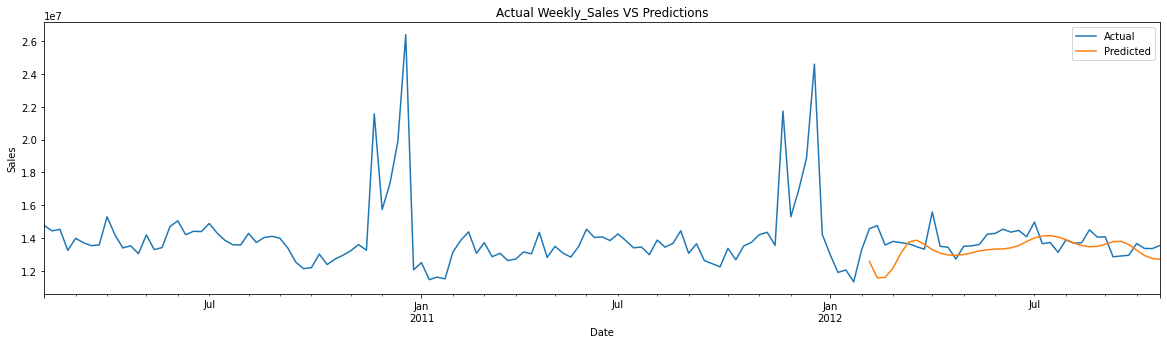

In [ ]:
rnn_pred_trans = main_rnn_pred_df.stack().reset_index()
rnn_pred_trans.columns = ['Date', 'Store_Dept_code', 'Weekly_Sales_Rnn']
df_with_pred = pd.merge(df_rnn,rnn_pred_trans, right_on = ['Date', 'Store_Dept_code'], left_on=['Date', 'Store_Dept_code'], how = 'left')
from sklearn import metrics
from sklearn.metrics import  r2_score
actual = df_with_pred[~df_with_pred.Weekly_Sales_Rnn.isnull()].Weekly_Sales
predicted = df_with_pred[~df_with_pred.Weekly_Sales_Rnn.isnull()].Weekly_Sales_Rnn


print('Mean Absolute Error:', metrics.mean_absolute_error(actual, predicted))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(actual, predicted))))
print('R2 Score:', r2_score(actual, predicted))
print(sum(np.abs(predicted- actual))/sum(predicted))
df_with_pred=df_with_pred.dropna()
pred_g = df_with_pred.groupby('Date')['Weekly_Sales','Weekly_Sales_Rnn'].sum()
act_g = tfd_fil_B.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_Rnn'].plot(legend = True)


threshold_date = tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions');

In [ ]:
df_rnn = tfd_fil_C[['Date', 'Store', 'Dept', 'Weekly_Sales']]
df_rnn['Date'] = pd.to_datetime(df_rnn['Date'], format = '%Y-%m-%d')
df_rnn['Date'].freq = 'W-FRI'
df_rnn['Store_Dept_code'] = df_rnn.apply(lambda x: str(x['Store']) + '-' + str(x['Dept']), axis = 1)
df_rnn_piv = df_rnn.pivot_table(index = 'Date', columns = 'Store_Dept_code', values = 'Weekly_Sales')
df_rnn_piv =df_rnn_piv.fillna(0)
import timeit
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense,LSTM
from keras import layers

#Main Timer
start_time_main = timeit.default_timer()

#Creating main prediction df
    # identifying the test index once
test_index = df_rnn_piv[df_rnn_piv.index>=threshold_date].index
main_rnn_pred_df = pd.DataFrame(index = test_index)

#threshold date
threshold_date = pd.to_datetime(tfd_fil_A.Date.unique()[-38]).strftime('%Y-%m-%d')
threshold_date
sample_size = 150
whole_range = df_rnn_piv.shape[1]

samp = 0
end = sample_size
start = 0

if (round(whole_range/sample_size)*sample_size)<whole_range:
    extra = 1
else:
    extra = 0
    
samples = round(whole_range/sample_size)+extra
while samp<samples:
    start_time = timeit.default_timer()
    print(f"Working on Sample: [{start}:{end}]")
    #print('start:',start,'end:',end )
 
    # Train Test split
    train_rnn = df_rnn_piv[df_rnn_piv.index<threshold_date].iloc[:,start:end]
    test_rnn = df_rnn_piv[df_rnn_piv.index>=threshold_date].iloc[:,start:end]  
    # Sampling for next round
    samp = samp+1
    start= start+sample_size
    end = end+sample_size


    # Scaling
    mms = MinMaxScaler()
    mms.fit(train_rnn)
    X_train_sc = mms.transform(train_rnn)
    X_test_sc = mms.transform(test_rnn)      #Generating the table
    length  = 48
    batch_size = 20 #Number of timeseries samples in each batch
    generator = TimeseriesGenerator(X_train_sc, X_train_sc, length=length, batch_size=batch_size)
    
        # define model
    model = Sequential()
    model.add(LSTM(128,activation= 'tanh',return_sequences=True, input_shape=(length,X_train_sc.shape[1])))
    model.add(LSTM(64, activation='tanh', return_sequences = False))
    model.add(Dense(X_train_sc.shape[1]))
    model.compile(optimizer='adam', loss='mse')
    
        # Model Training
    validation_generator = TimeseriesGenerator(X_test_sc,X_test_sc, length=20, batch_size=batch_size)
    model.fit(generator,epochs=160,
                        validation_data=validation_generator, verbose=2)#,callbacks=[early_stop])n_features = X_train_sc.shape[1]
    test_predictions = []
    first_eval_batch = X_train_sc[:length]
    current_batch = first_eval_batch.reshape((1, length, X_train_sc.shape[1]))

    for i in range(len(test_rnn)):
    
        # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
        current_pred = model.predict(current_batch)[0]
        # store prediction
        test_predictions.append(current_pred) 
        # update batch to now include prediction and drop first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

        # Creating prediction df
    inv_test_pred = mms.inverse_transform(test_predictions)
    pred_df = pd.DataFrame (data = inv_test_pred, columns =test_rnn.columns, index = test_rnn.index )
    main_rnn_pred_df = pd.merge(main_rnn_pred_df,pred_df, right_index=True, left_index=True)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Working on Sample: [0:150]
Epoch 1/160
3/3 - 5s - loss: 0.1421 - val_loss: 18.0476 - 5s/epoch - 2s/step
Epoch 2/160
3/3 - 0s - loss: 0.1053 - val_loss: 18.0217 - 299ms/epoch - 100ms/step
Epoch 3/160
3/3 - 0s - loss: 0.0818 - val_loss: 18.0128 - 292ms/epoch - 97ms/step
Epoch 4/160
3/3 - 0s - loss: 0.0647 - val_loss: 18.0141 - 287ms/epoch - 96ms/step
Epoch 5/160
3/3 - 0s - loss: 0.0511 - val_loss: 18.0156 - 283ms/epoch - 94ms/step
Epoch 6/160
3/3 - 0s - loss: 0.0422 - val_loss: 18.0117 - 305ms/epoch - 102ms/step
Epoch 7/160
3/3 - 0s - loss: 0.0366 - val_loss: 18.0068 - 291ms/epoch - 97ms/step
Epoch 8/160
3/3 - 0s - loss: 0.0333 - val_loss: 18.0032 - 293ms/epoch - 98ms/step
Epoch 9/160
3/3 - 0s - loss: 0.0316 - val_loss: 17.9972 - 302ms/epoch - 101ms/step
Epoch 10/160
3/3 - 0s - loss: 0.0307 - val_loss: 17.9918 - 310ms/epoch - 103ms/step
Epoch 11/160
3/3 - 0s - loss: 0.0302 - val_loss: 17.9890 - 307ms/epoch - 102ms/step
Epoch 12/160
3/3 - 0s - loss: 0.0298 - val_loss: 17.9866 - 303ms/epoc

Mean Absolute Error: 917.9766307720593
Root Mean Squared Error: 2507
R2 Score: 0.9763778902444279
0.10059053455112679


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


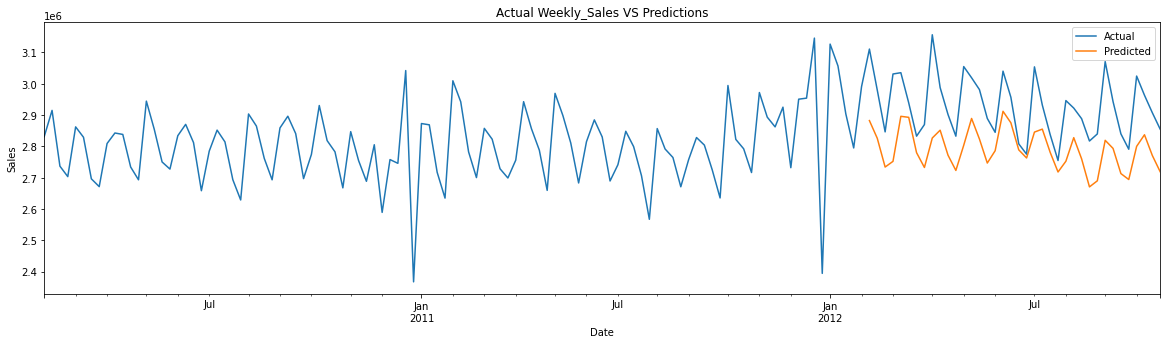

In [ ]:
rnn_pred_trans = main_rnn_pred_df.stack().reset_index()
rnn_pred_trans.columns = ['Date', 'Store_Dept_code', 'Weekly_Sales_Rnn']
df_with_pred = pd.merge(df_rnn,rnn_pred_trans, right_on = ['Date', 'Store_Dept_code'], left_on=['Date', 'Store_Dept_code'], how = 'left')
from sklearn import metrics
from sklearn.metrics import  r2_score
actual = df_with_pred[~df_with_pred.Weekly_Sales_Rnn.isnull()].Weekly_Sales
predicted = df_with_pred[~df_with_pred.Weekly_Sales_Rnn.isnull()].Weekly_Sales_Rnn


print('Mean Absolute Error:', metrics.mean_absolute_error(actual, predicted))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(actual, predicted))))
print('R2 Score:', r2_score(actual, predicted))
print(sum(np.abs(predicted- actual))/sum(predicted))
df_with_pred=df_with_pred.dropna()
pred_g = df_with_pred.groupby('Date')['Weekly_Sales','Weekly_Sales_Rnn'].sum()
act_g = tfd_fil_C.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_Rnn'].plot(legend = True)


threshold_date = tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions');

In [ ]:
sales=tfd_fil_A.groupby('Date')['Weekly_Sales'].sum()

In [ ]:
df_lstm=pd.DataFrame({'date':sales.index, 'weekly sales':sales.values})

In [ ]:
df_lstm

,date,weekly sales
0,2010-02-05,32144126.25
1,2010-02-12,30982570.79
2,2010-02-19,31000072.76
3,2010-02-26,28008995.99
4,2010-03-05,30020543.60
...,...,...
138,2012-09-28,27984906.58
139,2012-10-05,30868573.38
140,2012-10-12,29791614.12
141,2012-10-19,28851600.49


In [ ]:
df_lstm1=df_lstm.drop('date',axis=1)

Epoch 1/100
89/89 - 2s - loss: 0.0295 - 2s/epoch - 20ms/step
Epoch 2/100
89/89 - 0s - loss: 0.0179 - 130ms/epoch - 1ms/step
Epoch 3/100
89/89 - 0s - loss: 0.0152 - 151ms/epoch - 2ms/step
Epoch 4/100
89/89 - 0s - loss: 0.0146 - 150ms/epoch - 2ms/step
Epoch 5/100
89/89 - 0s - loss: 0.0146 - 137ms/epoch - 2ms/step
Epoch 6/100
89/89 - 0s - loss: 0.0147 - 133ms/epoch - 1ms/step
Epoch 7/100
89/89 - 0s - loss: 0.0146 - 144ms/epoch - 2ms/step
Epoch 8/100
89/89 - 0s - loss: 0.0145 - 135ms/epoch - 2ms/step
Epoch 9/100
89/89 - 0s - loss: 0.0146 - 125ms/epoch - 1ms/step
Epoch 10/100
89/89 - 0s - loss: 0.0144 - 126ms/epoch - 1ms/step
Epoch 11/100
89/89 - 0s - loss: 0.0145 - 133ms/epoch - 1ms/step
Epoch 12/100
89/89 - 0s - loss: 0.0145 - 133ms/epoch - 1ms/step
Epoch 13/100
89/89 - 0s - loss: 0.0144 - 126ms/epoch - 1ms/step
Epoch 14/100
89/89 - 0s - loss: 0.0143 - 131ms/epoch - 1ms/step
Epoch 15/100
89/89 - 0s - loss: 0.0144 - 155ms/epoch - 2ms/step
Epoch 16/100
89/89 - 0s - loss: 0.0144 - 130ms/epoc

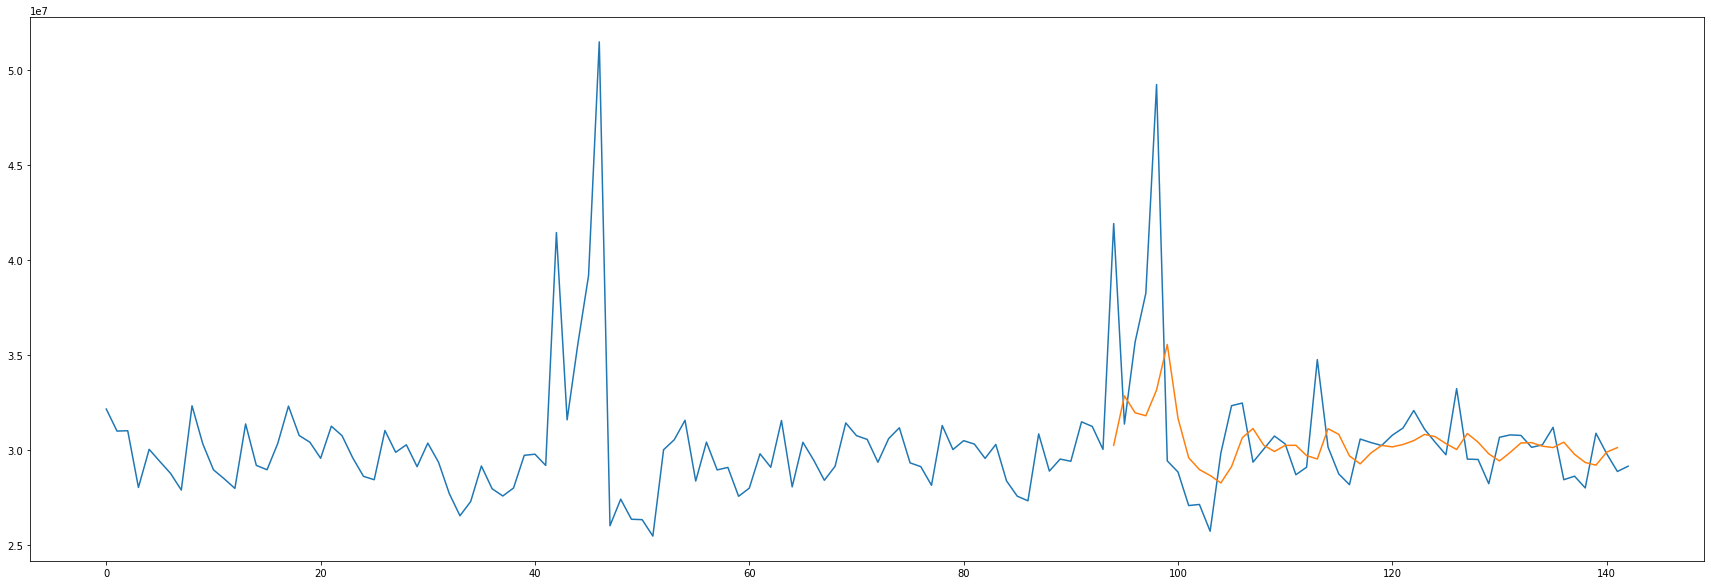

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(7)
dataset =df_lstm1
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.65)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(30,10))
plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:

print('Mean Absolute Error:', metrics.mean_absolute_error(testY[0], testPredict[:,0]))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(testY[0], testPredict[:,0]))))
print('R2 Score:', r2_score(testY[0], testPredict[:,0]))
print(np.mean(np.abs((testY[0] - testPredict[:,0]) / testPredict[:,0])) )

Mean Absolute Error: 2120690.6606253735
Root Mean Squared Error: 3572271
R2 Score: 0.11253091314514907
0.06854702206650343


*Splitting* and Scaling 

In [ ]:
from sklearn.model_selection import train_test_split

all_train = tfd_fil[tfd_fil.Date<'2011-11-01']
all_test = tfd_fil[tfd_fil.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)

Applying Light Gradient Boosting Regressor on the entire data

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train_sc, y_train)


In [ ]:
lgbm_model.score(X_test_sc, y_test)


0.9002000726867094

In [ ]:
y_pred = lgbm_model.predict(X_test_sc)


In [ ]:
from sklearn.metrics import  r2_score
print('Results of LGBM Model')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2 Score:', r2_score(y_test, y_pred))

Results of LGBM Model
Mean Absolute Error: 4329.669237567774
Root Mean Squared Error: 7339
R2 Score: 0.9002000726867094


In [ ]:
sum(np.abs(y_pred- y_test))/sum(y_pred)

0.2721811763519313

In [ ]:
lgbm_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_lgbm_pred': y_pred}, index = y_test.index)
lgbm_df = pd.merge(lgbm_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')

In [ ]:
lgbm_df.head()

,Weekly_Sales,Weekly_Sales_lgbm_pred,Date,Store,Dept
91,39886.06,22797.735358,2011-11-04,1,1
92,18689.54,21086.453830,2011-11-11,1,1
93,19050.66,21086.453830,2011-11-18,1,1
94,20911.25,23559.455231,2011-11-25,1,1
95,25293.49,22662.298497,2011-12-02,1,1


We notice poor results using LGBM without hyperparameter tuning

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


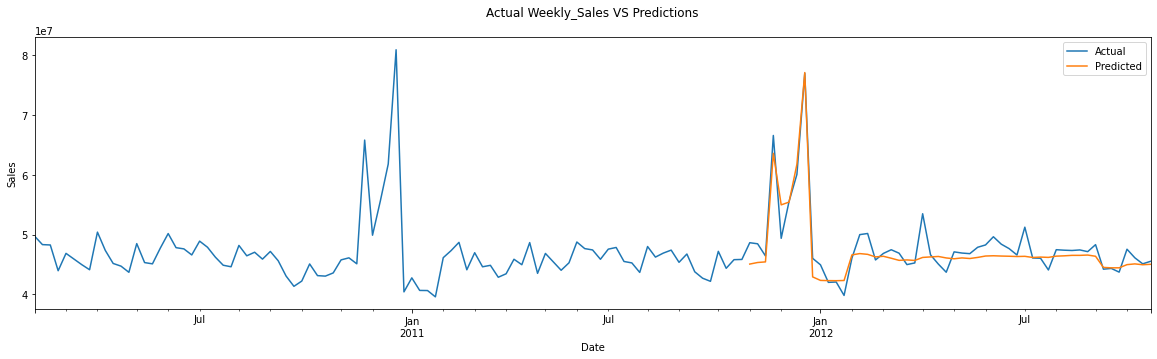

In [ ]:
pred_g = lgbm_df.groupby('Date')['Weekly_Sales','Weekly_Sales_lgbm_pred'].sum()
act_g = tfd.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_lgbm_pred'].plot(legend = True)


threshold_date = tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')

plt.title(f'Actual Weekly_Sales VS Predictions\n');

In [ ]:
test=testfd_fil.drop('Date',axis=1)
test_sc=mms.transform(test)
pred=lgbm_model.predict(test_sc)
predictions = pd.DataFrame({'Weekly_Sales': pred})
model_final = pd.concat([testfd_fil, predictions], axis = 1)[[ 'Date', 'Weekly_Sales']]
model_final=model_final.dropna()

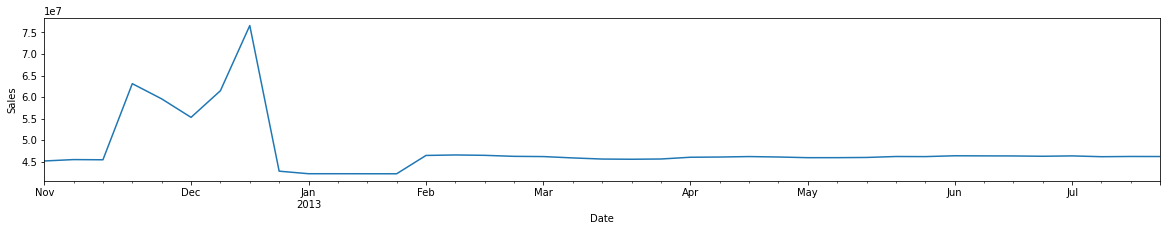

In [ ]:
ov_sales = model_final.groupby('Date').Weekly_Sales.sum()
plt.ylabel('Sales')


ov_sales.plot(figsize = (20,3))


In [ ]:
from sklearn.model_selection import train_test_split

tfd_fil_A=tfd_fil[tfd_fil['Type_num']==0]
all_train = tfd_fil_A[tfd_fil_A.Date<'2011-11-01']
all_test = tfd_fil_A[tfd_fil_A.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train_sc,y_train)
y_pred = lgbm_model.predict(X_test_sc)
from sklearn.metrics import  r2_score
print('Results of LGBM Model')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2 Score:', r2_score(y_test, y_pred))
sum(np.abs(y_pred- y_test))/sum(y_pred)

Results of LGBM Model
Mean Absolute Error: 4242.806006858461
Root Mean Squared Error: 7017
R2 Score: 0.9330544924863413


0.21154242721358613

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


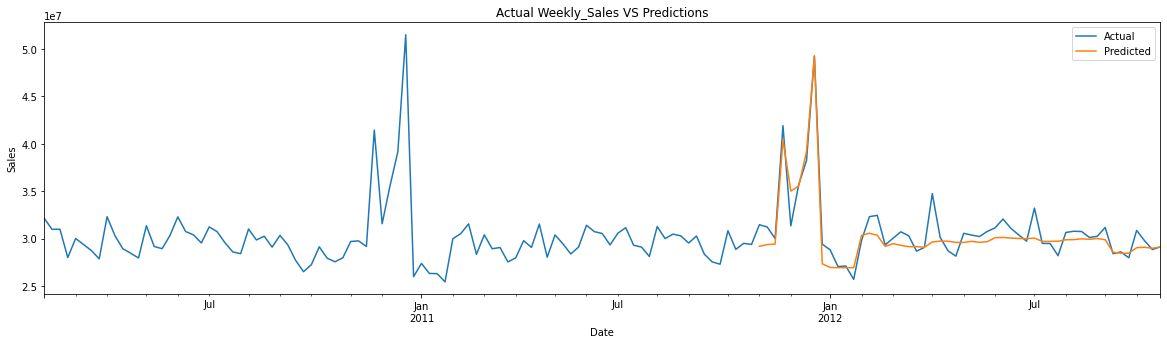

In [ ]:
lgbm_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_lgbm_pred': y_pred}, index = y_test.index)
lgbm_df = pd.merge(lgbm_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')
pred_g = lgbm_df.groupby('Date')['Weekly_Sales','Weekly_Sales_lgbm_pred'].sum()
act_g = tfd_fil_A.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_lgbm_pred'].plot(legend = True)


threshold_date = tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')

plt.title(f'Actual Weekly_Sales VS Predictions');

In [ ]:
from sklearn.model_selection import train_test_split

tfd_fil_B=tfd_fil[tfd_fil['Type_num']==1]
all_train = tfd_fil_B[tfd_fil_B.Date<'2011-11-01']
all_test = tfd_fil_B[tfd_fil_B.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train_sc,y_train)
y_pred = lgbm_model.predict(X_test_sc)
from sklearn.metrics import  r2_score
print('Results of LGBM Model')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2 Score:', r2_score(y_test, y_pred))
sum(np.abs(y_pred- y_test))/sum(y_pred)

Results of LGBM Model
Mean Absolute Error: 3329.1535559430654
Root Mean Squared Error: 6270
R2 Score: 0.8709321020046423


0.27448079902854644

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


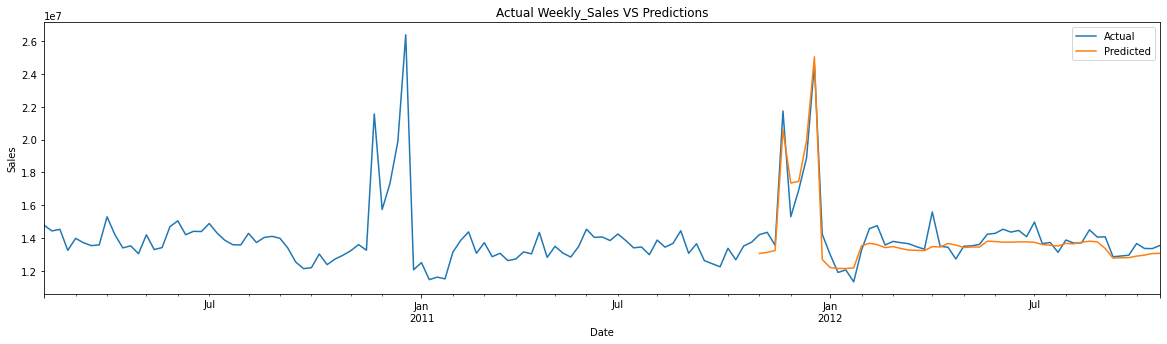

In [ ]:
lgbm_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_lgbm_pred': y_pred}, index = y_test.index)
lgbm_df = pd.merge(lgbm_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')
pred_g = lgbm_df.groupby('Date')['Weekly_Sales','Weekly_Sales_lgbm_pred'].sum()
act_g = tfd_fil_B.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_lgbm_pred'].plot(legend = True)


threshold_date = tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')

plt.title(f'Actual Weekly_Sales VS Predictions');

In [ ]:
from sklearn.model_selection import train_test_split

tfd_fil_C=tfd_fil[tfd_fil['Type_num']==2]
all_train = tfd_fil_C[tfd_fil_C.Date<'2011-11-01']
all_test = tfd_fil_C[tfd_fil_C.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train_sc,y_train)
y_pred = lgbm_model.predict(X_test_sc)
from sklearn.metrics import  r2_score
print('Results of LGBM Model')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2 Score:', r2_score(y_test, y_pred))
sum(np.abs(y_pred- y_test))/sum(y_pred)

Results of LGBM Model
Mean Absolute Error: 1068.6877477203473
Root Mean Squared Error: 2660
R2 Score: 0.9736697282755156


0.11709966094409623

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


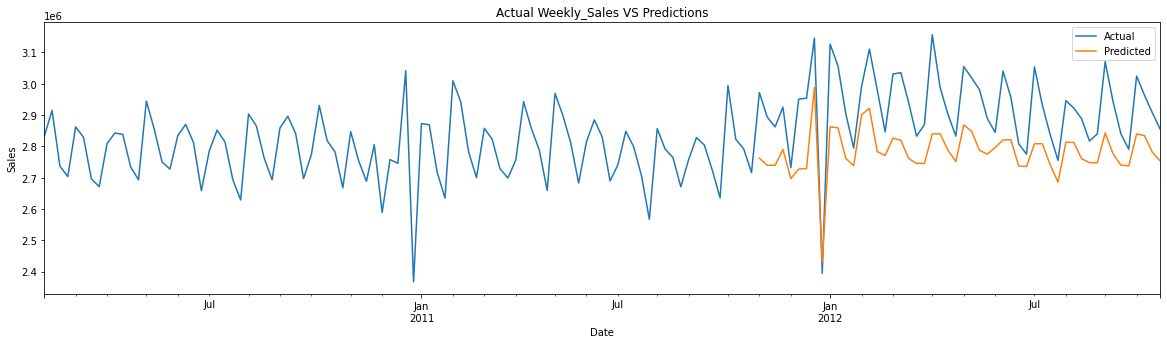

In [ ]:
lgbm_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_lgbm_pred': y_pred}, index = y_test.index)
lgbm_df = pd.merge(lgbm_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')
pred_g = lgbm_df.groupby('Date')['Weekly_Sales','Weekly_Sales_lgbm_pred'].sum()
act_g = tfd_fil_C.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_lgbm_pred'].plot(legend = True)


threshold_date = tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')

plt.title(f'Actual Weekly_Sales VS Predictions');

Using LGBM after applying required parameters

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.3, max_bin=150,
       max_depth=-1, min_child_samples=5, min_child_weight=0.001,
       min_data_in_leaf=3, min_depth=2, min_split_gain=0.0,
       n_estimators=3000, n_jobs=-1, num_leaves=80, objective='regression',
       random_state=42, reg_alpha=0.1, reg_lambda=2, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbose=1)


In [ ]:
from sklearn.model_selection import train_test_split


all_train = tfd_fil[tfd_fil.Date<'2011-11-01']
all_test = tfd_fil[tfd_fil.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)

In [ ]:
lgbm_model = lgbm.fit(X_train_sc,y_train)
y_pred = lgbm_model.predict(X_test_sc)
from sklearn.metrics import  r2_score
print('Results of LGBM Model')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2 Score:', r2_score(y_test, y_pred))

Results of LGBM Model
Mean Absolute Error: 1810.7561206622172
Root Mean Squared Error: 3986
R2 Score: 0.9705618811203187


In [ ]:
sum(np.abs(y_pred- y_test))/sum(y_pred)

0.11391071232073499

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


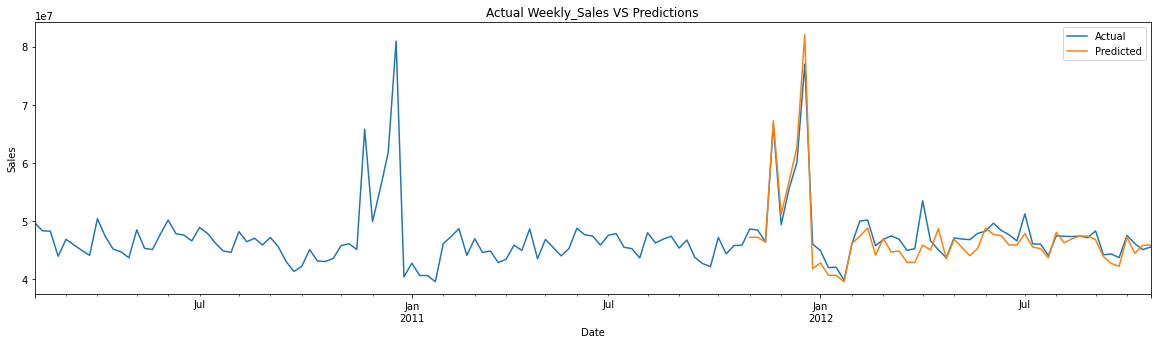

In [ ]:
lgbm_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_lgbm_pred': y_pred}, index = y_test.index)
lgbm_df = pd.merge(lgbm_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')
pred_g = lgbm_df.groupby('Date')['Weekly_Sales','Weekly_Sales_lgbm_pred'].sum()
act_g = tfd_fil.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_lgbm_pred'].plot(legend = True)


threshold_date = tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')

plt.title(f'Actual Weekly_Sales VS Predictions');

In [ ]:
from sklearn.model_selection import train_test_split

tfd_fil_A=tfd_fil[tfd_fil['Type_num']==0]
all_train = tfd_fil_A[tfd_fil_A.Date<'2011-11-01']
all_test = tfd_fil_A[tfd_fil_A.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']


#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)

In [ ]:
lgbm_model = lgbm.fit(X_train_sc,y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test_sc)

In [ ]:
from sklearn.metrics import  r2_score
print('Results of LGBM Model')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2 Score:', r2_score(y_test, y_pred))

Results of LGBM Model
Mean Absolute Error: 2125.2841823163876
Root Mean Squared Error: 4436
R2 Score: 0.9732430592703822


In [ ]:
sum(np.abs(y_pred- y_test))/sum(y_pred)


0.10585699460397559

In [ ]:
lgbm_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_lgbm_pred': y_pred}, index = y_test.index)
lgbm_df = pd.merge(lgbm_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')

In [ ]:

lgbm_df.head()

,Weekly_Sales,Weekly_Sales_lgbm_pred,Date,Store,Dept
91,39886.06,31106.127153,2011-11-04,1,1
92,18689.54,17211.410083,2011-11-11,1,1
93,19050.66,17167.148277,2011-11-18,1,1
94,20911.25,16377.760977,2011-11-25,1,1
95,25293.49,20770.713882,2011-12-02,1,1


LGBM on the entire dataset

Store type A

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


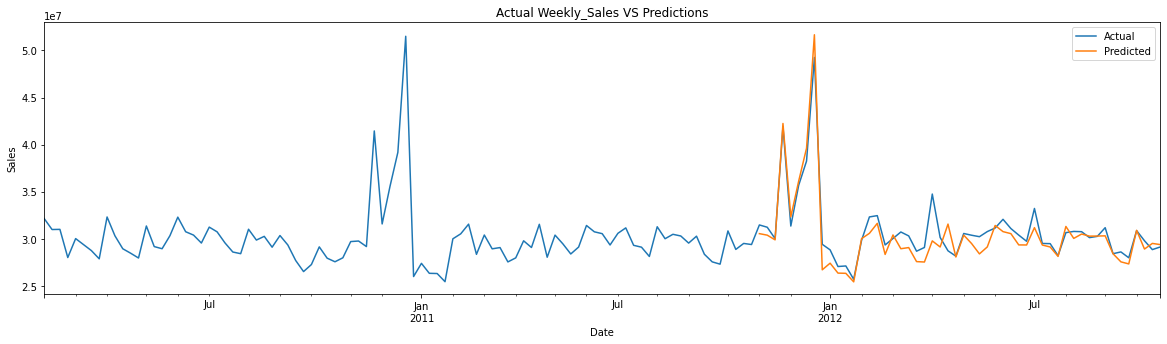

In [ ]:
pred_g = lgbm_df.groupby('Date')['Weekly_Sales','Weekly_Sales_lgbm_pred'].sum()
act_g = tfd_fil_A.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_lgbm_pred'].plot(legend = True)


threshold_date = tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil_A[tfd_fil_A.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')

plt.title(f'Actual Weekly_Sales VS Predictions');

In [ ]:
testfd_fil_A=testfd_fil[testfd_fil['Type_num']==0]
test_A=testfd_fil_A.drop('Date',axis=1)
test_A_sc=mms.transform(test_A)
A_pred=lgbm_model.predict(test_A_sc)
predictions = pd.DataFrame({'Weekly_Sales': A_pred})
model_final = pd.concat([testfd_fil_A, predictions], axis = 1)[[ 'Date', 'Weekly_Sales']]
model_final=model_final.dropna()

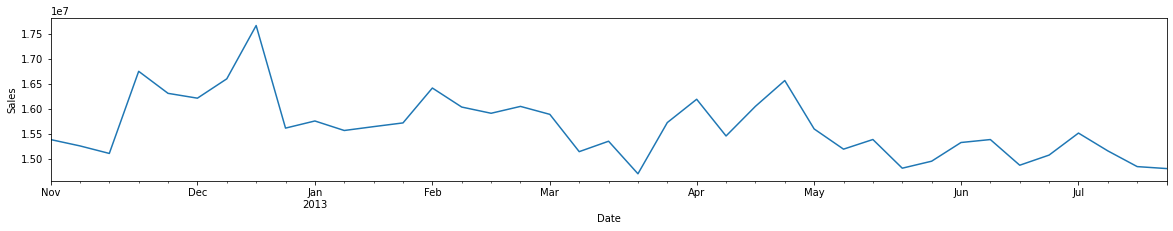

In [ ]:
ov_sales = model_final.groupby('Date').Weekly_Sales.sum()
plt.ylabel('Sales')
ov_sales.plot(figsize = (20,3))

In [ ]:
from sklearn.model_selection import train_test_split

tfd_fil_B=tfd_fil[tfd_fil['Type_num']==1]
all_train = tfd_fil_B[tfd_fil_B.Date<'2011-11-01']
all_test = tfd_fil_B[tfd_fil_B.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
lgbm_model = lgbm.fit(X_train_sc,y_train)

In [ ]:

y_pred = lgbm_model.predict(X_test_sc)
print('Results of LGBM Model')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2 Score:', r2_score(y_test, y_pred))

Results of LGBM Model
Mean Absolute Error: 1623.9713864539178
Root Mean Squared Error: 3614
R2 Score: 0.957130501485959


In [ ]:

sum(np.abs(y_pred- y_test))/sum(y_pred)

0.13359423181547575

In [ ]:
lgbm_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_lgbm_pred': y_pred}, index = y_test.index)
lgbm_df = pd.merge(lgbm_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')
lgbm_df.head()

,Weekly_Sales,Weekly_Sales_lgbm_pred,Date,Store,Dept
20573,15836.73,14655.180046,2011-11-04,3,1
20574,6525.18,6321.434951,2011-11-11,3,1
20575,7350.22,6876.742312,2011-11-18,3,1
20576,6912.38,6266.589887,2011-11-25,3,1
20577,9251.40,8777.719930,2011-12-02,3,1


Store type B

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


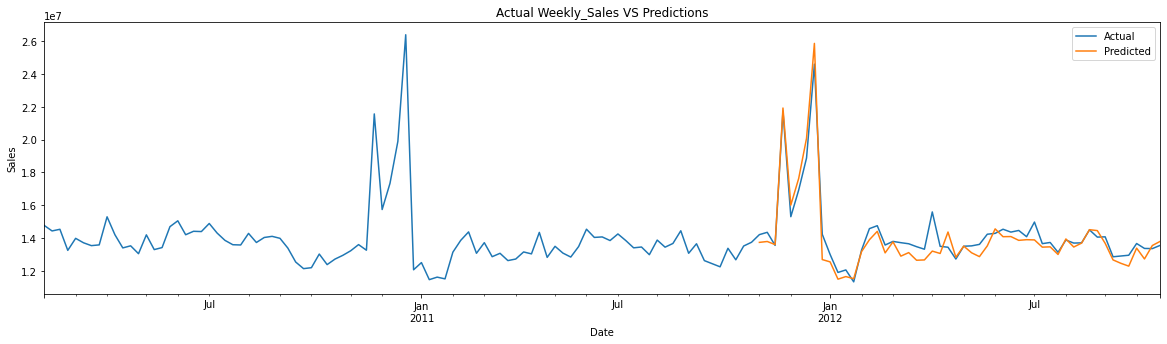

In [ ]:
pred_g = lgbm_df.groupby('Date')['Weekly_Sales','Weekly_Sales_lgbm_pred'].sum()
act_g = tfd_fil_B.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_lgbm_pred'].plot(legend = True)


threshold_date = tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')

plt.title(f'Actual Weekly_Sales VS Predictions');

In [ ]:
testfd_fil_B=testfd_fil[testfd_fil['Type_num']==1]
test_B=testfd_fil_B.drop('Date',axis=1)
test_B_sc=mms.transform(test_B)
B_pred=lgbm_model.predict(test_B_sc)
predictions = pd.DataFrame({'Weekly_Sales': B_pred})
model_final = pd.concat([testfd_fil_B, predictions], axis = 1)[[ 'Date', 'Weekly_Sales']]
model_final=model_final.dropna()

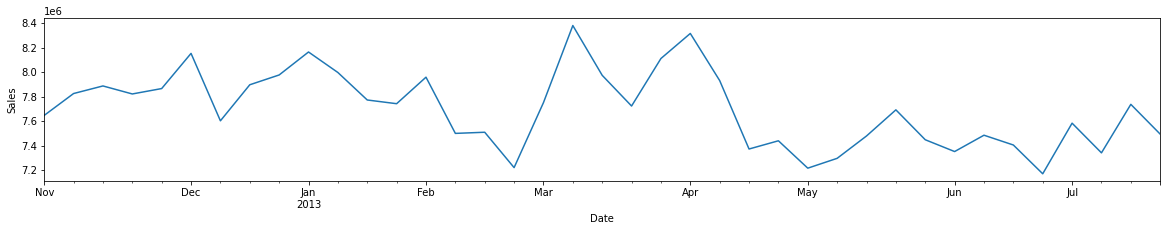

In [ ]:
ov_sales = model_final.groupby('Date').Weekly_Sales.sum()
plt.ylabel('Sales')
ov_sales.plot(figsize = (20,3))

In [ ]:
from sklearn.model_selection import train_test_split

tfd_fil_C=tfd_fil[tfd_fil['Type_num']==2]
all_train = tfd_fil_C[tfd_fil_C.Date<'2011-11-01']
all_test = tfd_fil_C[tfd_fil_C.Date>='2011-11-01']

X_train = all_train.drop(['Date','Weekly_Sales'], axis = 1)
X_test = all_test.drop(['Date','Weekly_Sales'], axis = 1)

y_train = all_train['Weekly_Sales']
y_test = all_test['Weekly_Sales']
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_sc = mms.transform(X_train)
X_test_sc = mms.transform(X_test)
lgbm_model = lgbm.fit(X_train_sc,y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test_sc)
print('Results of LGBM Model')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2 Score:', r2_score(y_test, y_pred))

Results of LGBM Model
Mean Absolute Error: 891.8884857683386
Root Mean Squared Error: 2520
R2 Score: 0.9763763347689205


In [ ]:
lgbm_pr = pd.DataFrame({'Weekly_Sales':y_test.values, 'Weekly_Sales_lgbm_pred': y_pred}, index = y_test.index)
lgbm_df = pd.merge(lgbm_pr, tfd_fil[['Date', 'Store', 'Dept']], left_index = True, right_index = True, how = 'left')
lgbm_df.head()

,Weekly_Sales,Weekly_Sales_lgbm_pred,Date,Store,Dept
286639,21790.21,16282.382098,2011-11-04,30,1
286640,7541.74,6739.774525,2011-11-11,30,1
286641,7961.22,6232.107002,2011-11-18,30,1
286642,7996.47,7479.965541,2011-11-25,30,1
286643,8797.14,6905.290748,2011-12-02,30,1


Store type C

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


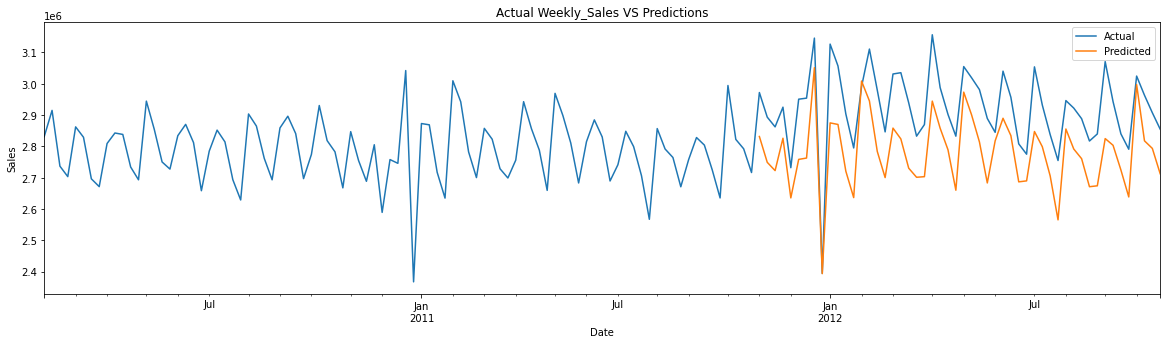

In [ ]:
pred_g = lgbm_df.groupby('Date')['Weekly_Sales','Weekly_Sales_lgbm_pred'].sum()
act_g = tfd_fil_C.groupby('Date')['Weekly_Sales'].sum()

ax = act_g[act_g.index>'2010-01-01'].plot(figsize = (20,5), legend = True)
pred_g['Weekly_Sales_lgbm_pred'].plot(legend = True)


threshold_date = tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[0].strftime('%Y-%m-%d')
end_date =tfd_fil[tfd_fil.Date>'2012-01-01']['Date'].iloc[-1].strftime('%Y-%m-%d')
plt.legend(["Actual", "Predicted"])
plt.ylabel('Sales')
plt.title(f'Actual Weekly_Sales VS Predictions');

In [ ]:
testfd_fil_C=testfd_fil[testfd_fil['Type_num']==2]
test_C=testfd_fil_C.drop('Date',axis=1)
test_C_sc=mms.transform(test_C)
C_pred=lgbm_model.predict(test_C_sc)
predictions = pd.DataFrame({'Weekly_Sales': C_pred})
model_final = pd.concat([testfd_fil_C, predictions], axis = 1)[[ 'Date', 'Weekly_Sales']]
model_final=model_final.dropna()

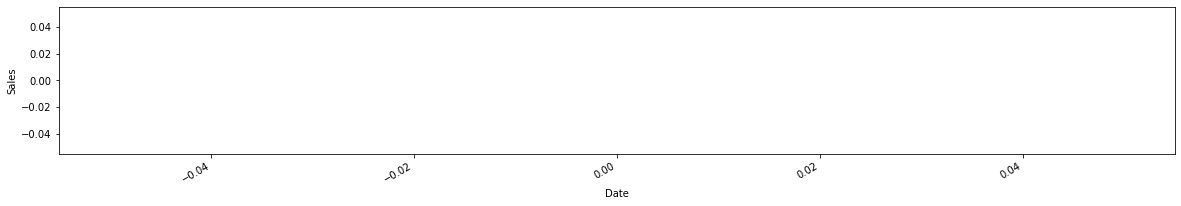

In [ ]:
ov_sales = model_final.groupby('Date').Weekly_Sales.sum()
plt.ylabel('Sales')
ov_sales.plot(figsize = (20,3))

In [ ]:
 wmape = sum(np.abs(y_pred- y_test))/sum(y_pred)

In [ ]:
wmape

0.09781428832690704

In [ ]:
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

inf